In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [3]:
path = "/home/drugo/Sim/torgonMaziaViote/"                
os.chdir(path)

In [4]:
dfS= pd.read_csv('simulated.csv',sep=',',skiprows=0,low_memory=False)
dfS.head()

Unnamed: 0                 Datetime  faoTBow  ptTBow  soTBow  \
0  2005-01-01 00:00:00 NaN  2005-01-01 00:00:00      NaN     NaN     NaN   
1  2005-01-01 00:30:00 NaN  2005-01-01 00:30:00      NaN     NaN     NaN   
2  2005-01-01 01:00:00 NaN  2005-01-01 01:00:00      NaN     NaN     NaN   
3  2005-01-01 01:30:00 NaN  2005-01-01 01:30:00      NaN     NaN     NaN   
4  2005-01-01 02:00:00 NaN  2005-01-01 02:00:00      NaN     NaN     NaN   

    faoVBow    ptVBow     soVBow  faoMBow  ptMBow  soMBow  
0  9.784312  0.347062  13.775188      NaN     NaN     NaN  
1  9.784312  0.347062  13.775188      NaN     NaN     NaN  
2  9.784312  0.347062  13.775188      NaN     NaN     NaN  
3  9.784312  0.347062  13.775188      NaN     NaN     NaN  
4  9.784312  0.347062  13.775188      NaN     NaN     NaN

In [5]:
dfO= pd.read_csv('observed.csv',sep=',',skiprows=0,low_memory=False)
dfO.rename(columns={list(dfO)[0]:'Datetime'}, inplace=True)
dfO.head()

Datetime  obsT    obsV  obsM
0  2005-01-01 00:00:00   NaN -9999.0   NaN
1  2005-01-01 00:30:00   NaN -9999.0   NaN
2  2005-01-01 01:00:00   NaN -9999.0   NaN
3  2005-01-01 01:30:00   NaN -9999.0   NaN
4  2005-01-01 02:00:00   NaN -9999.0   NaN

In [6]:
dfS['Datetime'] = pd.to_datetime(dfS['Datetime'], dayfirst=True)
dfS['Datetime'] = dfS['Datetime'].dt.strftime('%Y-%m-%d %H:%M')

dfO['Datetime'] = pd.to_datetime(dfO['Datetime'], dayfirst=True)
dfO['Datetime'] = dfO['Datetime'].dt.strftime('%Y-%m-%d %H:%M')

In [7]:
dfO.shape

(245424, 4)

In [8]:
dfS.shape

(245424, 12)

In [9]:
df = pd.concat([dfS,dfO.iloc[:,1:]],axis=1, sort=False)

In [10]:
df.head()

Unnamed: 0              Datetime  faoTBow  ptTBow  soTBow  \
0  2005-01-01 00:00:00 NaN  2005-01-01 00:00      NaN     NaN     NaN   
1  2005-01-01 00:30:00 NaN  2005-01-01 00:30      NaN     NaN     NaN   
2  2005-01-01 01:00:00 NaN  2005-01-01 01:00      NaN     NaN     NaN   
3  2005-01-01 01:30:00 NaN  2005-01-01 01:30      NaN     NaN     NaN   
4  2005-01-01 02:00:00 NaN  2005-01-01 02:00      NaN     NaN     NaN   

    faoVBow    ptVBow     soVBow  faoMBow  ptMBow  soMBow  obsT    obsV  obsM  
0  9.784312  0.347062  13.775188      NaN     NaN     NaN   NaN -9999.0   NaN  
1  9.784312  0.347062  13.775188      NaN     NaN     NaN   NaN -9999.0   NaN  
2  9.784312  0.347062  13.775188      NaN     NaN     NaN   NaN -9999.0   NaN  
3  9.784312  0.347062  13.775188      NaN     NaN     NaN   NaN -9999.0   NaN  
4  9.784312  0.347062  13.775188      NaN     NaN     NaN   NaN -9999.0   NaN

In [11]:
df['month'] = pd.DatetimeIndex(df['Datetime']).month
df.head()

Unnamed: 0              Datetime  faoTBow  ptTBow  soTBow  \
0  2005-01-01 00:00:00 NaN  2005-01-01 00:00      NaN     NaN     NaN   
1  2005-01-01 00:30:00 NaN  2005-01-01 00:30      NaN     NaN     NaN   
2  2005-01-01 01:00:00 NaN  2005-01-01 01:00      NaN     NaN     NaN   
3  2005-01-01 01:30:00 NaN  2005-01-01 01:30      NaN     NaN     NaN   
4  2005-01-01 02:00:00 NaN  2005-01-01 02:00      NaN     NaN     NaN   

    faoVBow    ptVBow     soVBow  faoMBow  ptMBow  soMBow  obsT    obsV  obsM  \
0  9.784312  0.347062  13.775188      NaN     NaN     NaN   NaN -9999.0   NaN   
1  9.784312  0.347062  13.775188      NaN     NaN     NaN   NaN -9999.0   NaN   
2  9.784312  0.347062  13.775188      NaN     NaN     NaN   NaN -9999.0   NaN   
3  9.784312  0.347062  13.775188      NaN     NaN     NaN   NaN -9999.0   NaN   
4  9.784312  0.347062  13.775188      NaN     NaN     NaN   NaN -9999.0   NaN   

   month  
0      1  
1      1  
2      1  
3      1  
4      1

In [12]:
df.index = df['Datetime']
df.index = pd.DatetimeIndex(df.index)

In [13]:
df = df.iloc[:,3:]
df.head()

faoTBow  ptTBow  soTBow   faoVBow    ptVBow     soVBow  \
Datetime                                                                      
2005-01-01 00:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-01-01 00:30:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-01-01 01:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-01-01 01:30:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-01-01 02:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   

                     faoMBow  ptMBow  soMBow  obsT    obsV  obsM  month  
Datetime                                                                 
2005-01-01 00:00:00      NaN     NaN     NaN   NaN -9999.0   NaN      1  
2005-01-01 00:30:00      NaN     NaN     NaN   NaN -9999.0   NaN      1  
2005-01-01 01:00:00      NaN     NaN     NaN   NaN -9999.0   NaN      1  
2005-01-01 01:30:00      NaN     NaN     NaN   NaN -9999.0   NaN      1  
2005-01-01 02:00:00      NaN     NaN     NaN   NaN -9999.0   NaN      1

In [14]:
#---------------------------
df.to_csv('final.csv')
#---------------------------

In [15]:
df[df ==-9999]=np.nan
df[df ==0]=np.nan

In [16]:
dfValues = df[df['month'].isin(range(5,11))]#.iloc[:,:].dropna(how='any')
dfValues.head()

faoTBow  ptTBow  soTBow   faoVBow    ptVBow     soVBow  \
Datetime                                                                      
2005-05-01 00:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 00:30:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 01:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 01:30:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 02:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   

                     faoMBow  ptMBow  soMBow  obsT  obsV  obsM  month  
Datetime                                                               
2005-05-01 00:00:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 00:30:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 01:00:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 01:30:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 02:00:00      NaN     NaN     NaN   NaN   NaN   NaN      5

In [17]:
dfValues.shape

(123648, 13)

In [18]:
# plt.style.use('ggplot')

# fig = plt.figure(figsize=(20,10))
# ax1 = fig.add_subplot(111)
# dfValues.plot(ax=ax1,y=['obs','so','pt','fao'],kind='line', stacked=False,
#               label=['obs','so','pt','fao'],linewidth=2)                  
# ax1.xaxis.set_tick_params(labelsize=20)
# ax1.yaxis.set_tick_params(labelsize=20)

# ax1.legend(loc=1)
# plt.xlabel('Days',fontsize=20)
# ax1.set_ylabel('Latent heat [W/m2] ',fontsize=20)
# plt.show()

In [19]:
dfDiff = pd.concat([abs(dfValues['faoTBow']-dfValues['obsT']), 
                    abs(dfValues['ptTBow']-dfValues['obsT']),
                    abs(dfValues['soTBow']-dfValues['obsT']),
                    abs(dfValues['faoVBow']-dfValues['obsV']), 
                    abs(dfValues['ptVBow']-dfValues['obsV']),
                    abs(dfValues['soVBow']-dfValues['obsV']),
                    abs(dfValues['faoMBow']-dfValues['obsM']), 
                    abs(dfValues['ptMBow']-dfValues['obsM']),
                    abs(dfValues['soMBow']-dfValues['obsM'])
                   ],axis=1, sort=False)
dfDiff.head()
dfDiff.columns = ['errTFAO','errTPT','errTSO',
                  'errVFAO','errVPT','errVSO',
                  'errMFAO','errMPT','errMSO']


In [20]:
dfDiff['month'] = dfDiff.index.month
dfDiff.head()

errTFAO  errTPT  errTSO  errVFAO  errVPT  errVSO  \
Datetime                                                                
2005-05-01 00:00:00      NaN     NaN     NaN      NaN     NaN     NaN   
2005-05-01 00:30:00      NaN     NaN     NaN      NaN     NaN     NaN   
2005-05-01 01:00:00      NaN     NaN     NaN      NaN     NaN     NaN   
2005-05-01 01:30:00      NaN     NaN     NaN      NaN     NaN     NaN   
2005-05-01 02:00:00      NaN     NaN     NaN      NaN     NaN     NaN   

                     errMFAO  errMPT  errMSO  month  
Datetime                                             
2005-05-01 00:00:00      NaN     NaN     NaN      5  
2005-05-01 00:30:00      NaN     NaN     NaN      5  
2005-05-01 01:00:00      NaN     NaN     NaN      5  
2005-05-01 01:30:00      NaN     NaN     NaN      5  
2005-05-01 02:00:00      NaN     NaN     NaN      5

In [21]:
print(dfValues.shape)
dfValues.head()

(123648, 13)


faoTBow  ptTBow  soTBow   faoVBow    ptVBow     soVBow  \
Datetime                                                                      
2005-05-01 00:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 00:30:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 01:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 01:30:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 02:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   

                     faoMBow  ptMBow  soMBow  obsT  obsV  obsM  month  
Datetime                                                               
2005-05-01 00:00:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 00:30:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 01:00:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 01:30:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 02:00:00      NaN     NaN     NaN   NaN   NaN   NaN      5

In [22]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
# ax11 = axes[0]
# ax12 = axes[1] 
# ax13 = axes[2] 

# #ax11 = axes[0][0] 
# #ax12 = axes[0][1] 
# #ax13 = axes[1][0] 
# #ax14 = axes[1][1]

# plt.style.use('ggplot')
# dfTot.plot(kind='scatter', x=['obs','obs+bowerr','obs+err'], y=['so','soBow','soRes'], color=['darkorange','cyan','black'], 
#            ax=ax11,title='SO') #dfDiff['errSO']/3)
# #dfValues.plot(kind='scatter', x='obs', y='so stress', color=['darkorange'], ax=ax12,
# #              title='SO stress',s=dfDiff['errSO']/3)
# dfTot.plot(kind='scatter', x=['obs','obs+bowerr','obs+err'], y=['fao','faoBow','faoRes'],# color=['darkorange','cyan','black'],
#            ax=ax12,  title='Fao') #s=dfDiff['errFAO']/3)
# dfTot.plot(kind='scatter', x=['obs','obs+bowerr','obs+err'], y=['pt','ptBow','ptRes'], #color=['darkorange','cyan','black'],
#            ax=ax13,title='Priestley - Taylor') #s=dfDiff['errPT']/3)
# yticks = np.arange(start=-100, stop=100, step=100)
# for ax in [ax11, ax12, ax13]:
#     ax.get_xaxis().set_ticks(yticks)
#     ax.yaxis.set_ticks(yticks)
#     ax.tick_params(axis='both', which='major', labelsize=12)
#     ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
# fig.add_subplot(111, frameon=False);
# plt.grid(False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.xlabel("Latent heat observed + error [W/m2] \n", size=15, family='DejaVu Sans');   
# plt.ylabel("Latent heat simulated [W/m2] \n", size=15, family='DejaVu Sans');   

# plt.title("Deviation \n", size=22, family='DejaVu Sans');
# plt.tight_layout()    

In [23]:
import seaborn as sns

In [24]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
# ax11 = axes[0]
# ax12 = axes[1] 
# ax13 = axes[2] 
# #plt.style.use('ggplot')
# sns.regplot(x=dfValues["obsT"], y=dfValues["ptTBow"],ax=ax11, fit_reg=True)

# #dfValues.plot(kind='scatter', x='obs', y='so stress', color=['darkorange'], ax=ax12,
# #              title='SO stress',s=dfDiff['errSO']/3)
# sns.regplot(x=dfValues["obsT"], y=dfValues["ptTBow"],ax=ax12, fit_reg=True)
# sns.regplot(x=dfValues["obsT"], y=dfValues["ptTBow"],ax=ax13, fit_reg=True)
# yticks = np.arange(start=-100, stop=100, step=100)
# for ax in [ax11, ax12, ax13]:
#     ax.get_xaxis().set_ticks(yticks)
#     ax.yaxis.set_ticks(yticks)
#     ax.tick_params(axis='both', which='major', labelsize=12)
#     ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
# fig.add_subplot(111, frameon=False);
# plt.grid(False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.xlabel("Latent heat observed + error [W/m2] \n", size=15, family='DejaVu Sans');   
# plt.ylabel("Latent heat simulated [W/m2] \n", size=15, family='DejaVu Sans');   

# plt.title("Deviation \n", size=22, family='DejaVu Sans');
# plt.tight_layout()    

(0, 800)

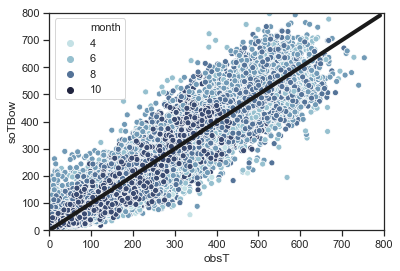

In [25]:
import seaborn as sns
sns.set(style="ticks")

# Load the example iris dataset
# planets = sns.load_dataset("planets")
# cmap = sns.light_palette("darkred", as_cmap=True)
# # cmap = plt.get_cmap("RdBu_r")
# cmap.set_bad(color='red', alpha=0.5)
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.regplot(x=dfValues['obsT'], y=dfValues['obsT'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},marker="o")
g = sns.scatterplot(x=dfValues['obsT'], y=dfValues['soTBow'],
                      hue=dfValues['month'], palette=cmap, sizes=(20, 20))#
                     #data=planets)

g.set_ylim([-0,800])
g.set_xlim([-0,800])

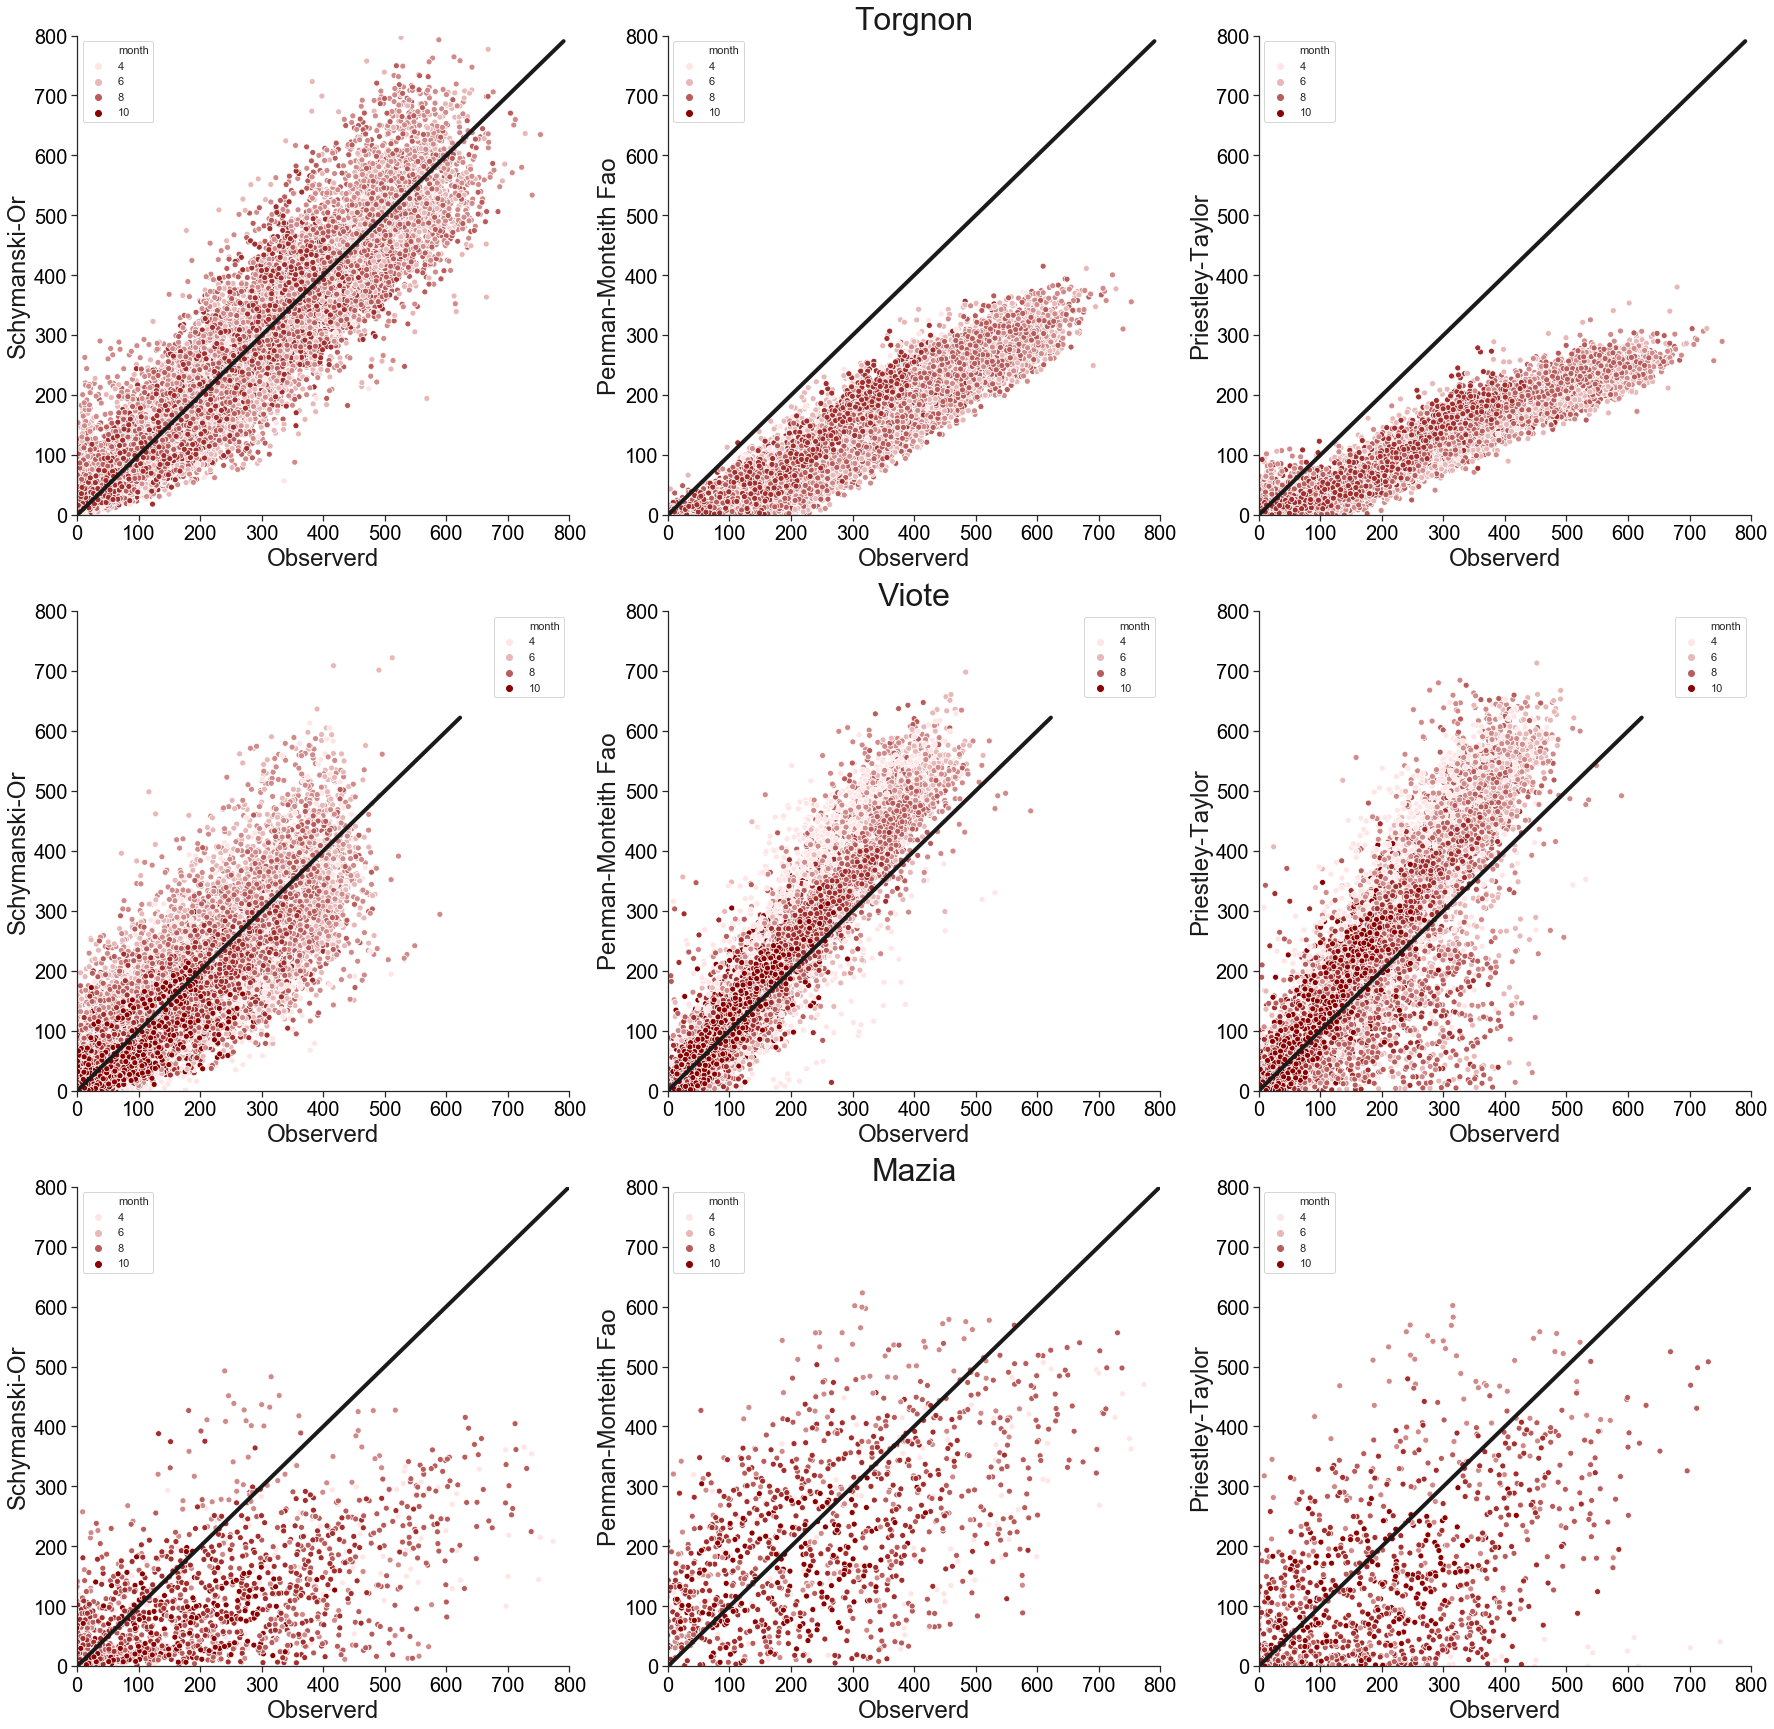

In [26]:
g, axes = plt.subplots(nrows=3, ncols=3)
ax11 = axes[0][0]  
ax12 = axes[0][1]  
ax13 = axes[0][2] 
ax21 = axes[1][0]  
ax22 = axes[1][1]  
ax23 = axes[1][2] 
ax31 = axes[2][0]  
ax32 = axes[2][1]  
ax33 = axes[2][2] 
#  	faoTBow 	ptTBow 	soTBow 	faoVBow 	ptVBow 	soVBow 	faoMBow 	ptMBow 	soMBow 	obsT 	obsV 	obsM

sns.set(style="ticks")
cmap = sns.light_palette("darkred", as_cmap=True)

#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

##################            TORGNON            #############################
g = sns.regplot(x=dfValues['obsT'], y=dfValues['obsT'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax11,marker="o")
g = sns.scatterplot(x=dfValues['obsT'], y=dfValues['soTBow'],hue=dfValues['month'], palette=cmap, ax=ax11, sizes=(20, 20))#
##################            TORGNON            #############################

g = sns.regplot(x=dfValues['obsT'], y=dfValues['obsT'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax12,marker="o")
g = sns.scatterplot(x=dfValues['obsT'], y=dfValues['ptTBow'],hue=dfValues['month'], palette=cmap, ax=ax12, sizes=(20, 20))
g.axes.set_title('Torgnon', fontsize=32,color="k",alpha=1)
##################            TORGNON            #############################

g = sns.regplot(x=dfValues['obsT'], y=dfValues['obsT'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax13,marker="o")
g = sns.scatterplot(x=dfValues['obsT'], y=dfValues["faoTBow"],hue=dfValues['month'], palette=cmap, ax=ax13, sizes=(20, 20))
################################################################################

##################            VIOTE            #############################
g = sns.regplot(x=dfValues['obsV'], y=dfValues['obsV'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax21,marker="o")
g = sns.scatterplot(x=dfValues['obsV'], y=dfValues['soVBow'],hue=dfValues['month'], palette=cmap, ax=ax21, sizes=(20, 20))
##################            VIOTE            #############################

g = sns.regplot(x=dfValues['obsV'], y=dfValues['obsV'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax22,marker="o")
g = sns.scatterplot(x=dfValues['obsV'], y=dfValues['ptVBow'], hue=dfValues['month'], palette=cmap, ax=ax22, sizes=(20, 20))
g.axes.set_title('Viote', fontsize=32,color="k",alpha=1)
##################            VIOTE            #############################

g = sns.regplot(x=dfValues['obsV'], y=dfValues['obsV'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax23,marker="o")
g = sns.scatterplot(x=dfValues['obsV'], y=dfValues["faoVBow"],hue=dfValues['month'], palette=cmap, ax=ax23, sizes=(20, 20))
################################################################################


##################            MAZIA            #############################
g = sns.regplot(x=dfValues['obsM'], y=dfValues['obsM'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax31,marker="o")
g = sns.scatterplot(x=dfValues['obsM'], y=dfValues['soMBow'],hue=dfValues['month'], palette=cmap, ax=ax31, sizes=(20, 20))
##################            MAZIA            #############################

g = sns.regplot(x=dfValues['obsM'], y=dfValues['obsM'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax32,marker="o")
g = sns.scatterplot(x=dfValues['obsM'], y=dfValues['ptMBow'], hue=dfValues['month'], palette=cmap, ax=ax32, sizes=(20, 20))
g.axes.set_title('Mazia', fontsize=32,color="k",alpha=1)
##################            MAZIA            #############################

g = sns.regplot(x=dfValues['obsM'], y=dfValues['obsM'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax33,marker="o")
g = sns.scatterplot(x=dfValues['obsM'], y=dfValues["faoMBow"], hue=dfValues['month'], palette=cmap, ax=ax33, sizes=(20, 20))
################################################################################
sns.despine()
ax11.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
ax12.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
ax13.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)

ax21.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
ax22.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
ax23.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)

ax31.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
ax32.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
ax33.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)
g.figure.set_size_inches(30,30)
for ax in [ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33]:
    ax.set_ylim([-0,800])
    ax.set_xlim([-0,800])
    
# g.set_ylim([-0,800])
# g.set_xlim([-0,800])

    ax.set_xlabel("Observerd",size = 24,color="k",alpha=1)
    ax.tick_params(labelsize=20,labelcolor="black")

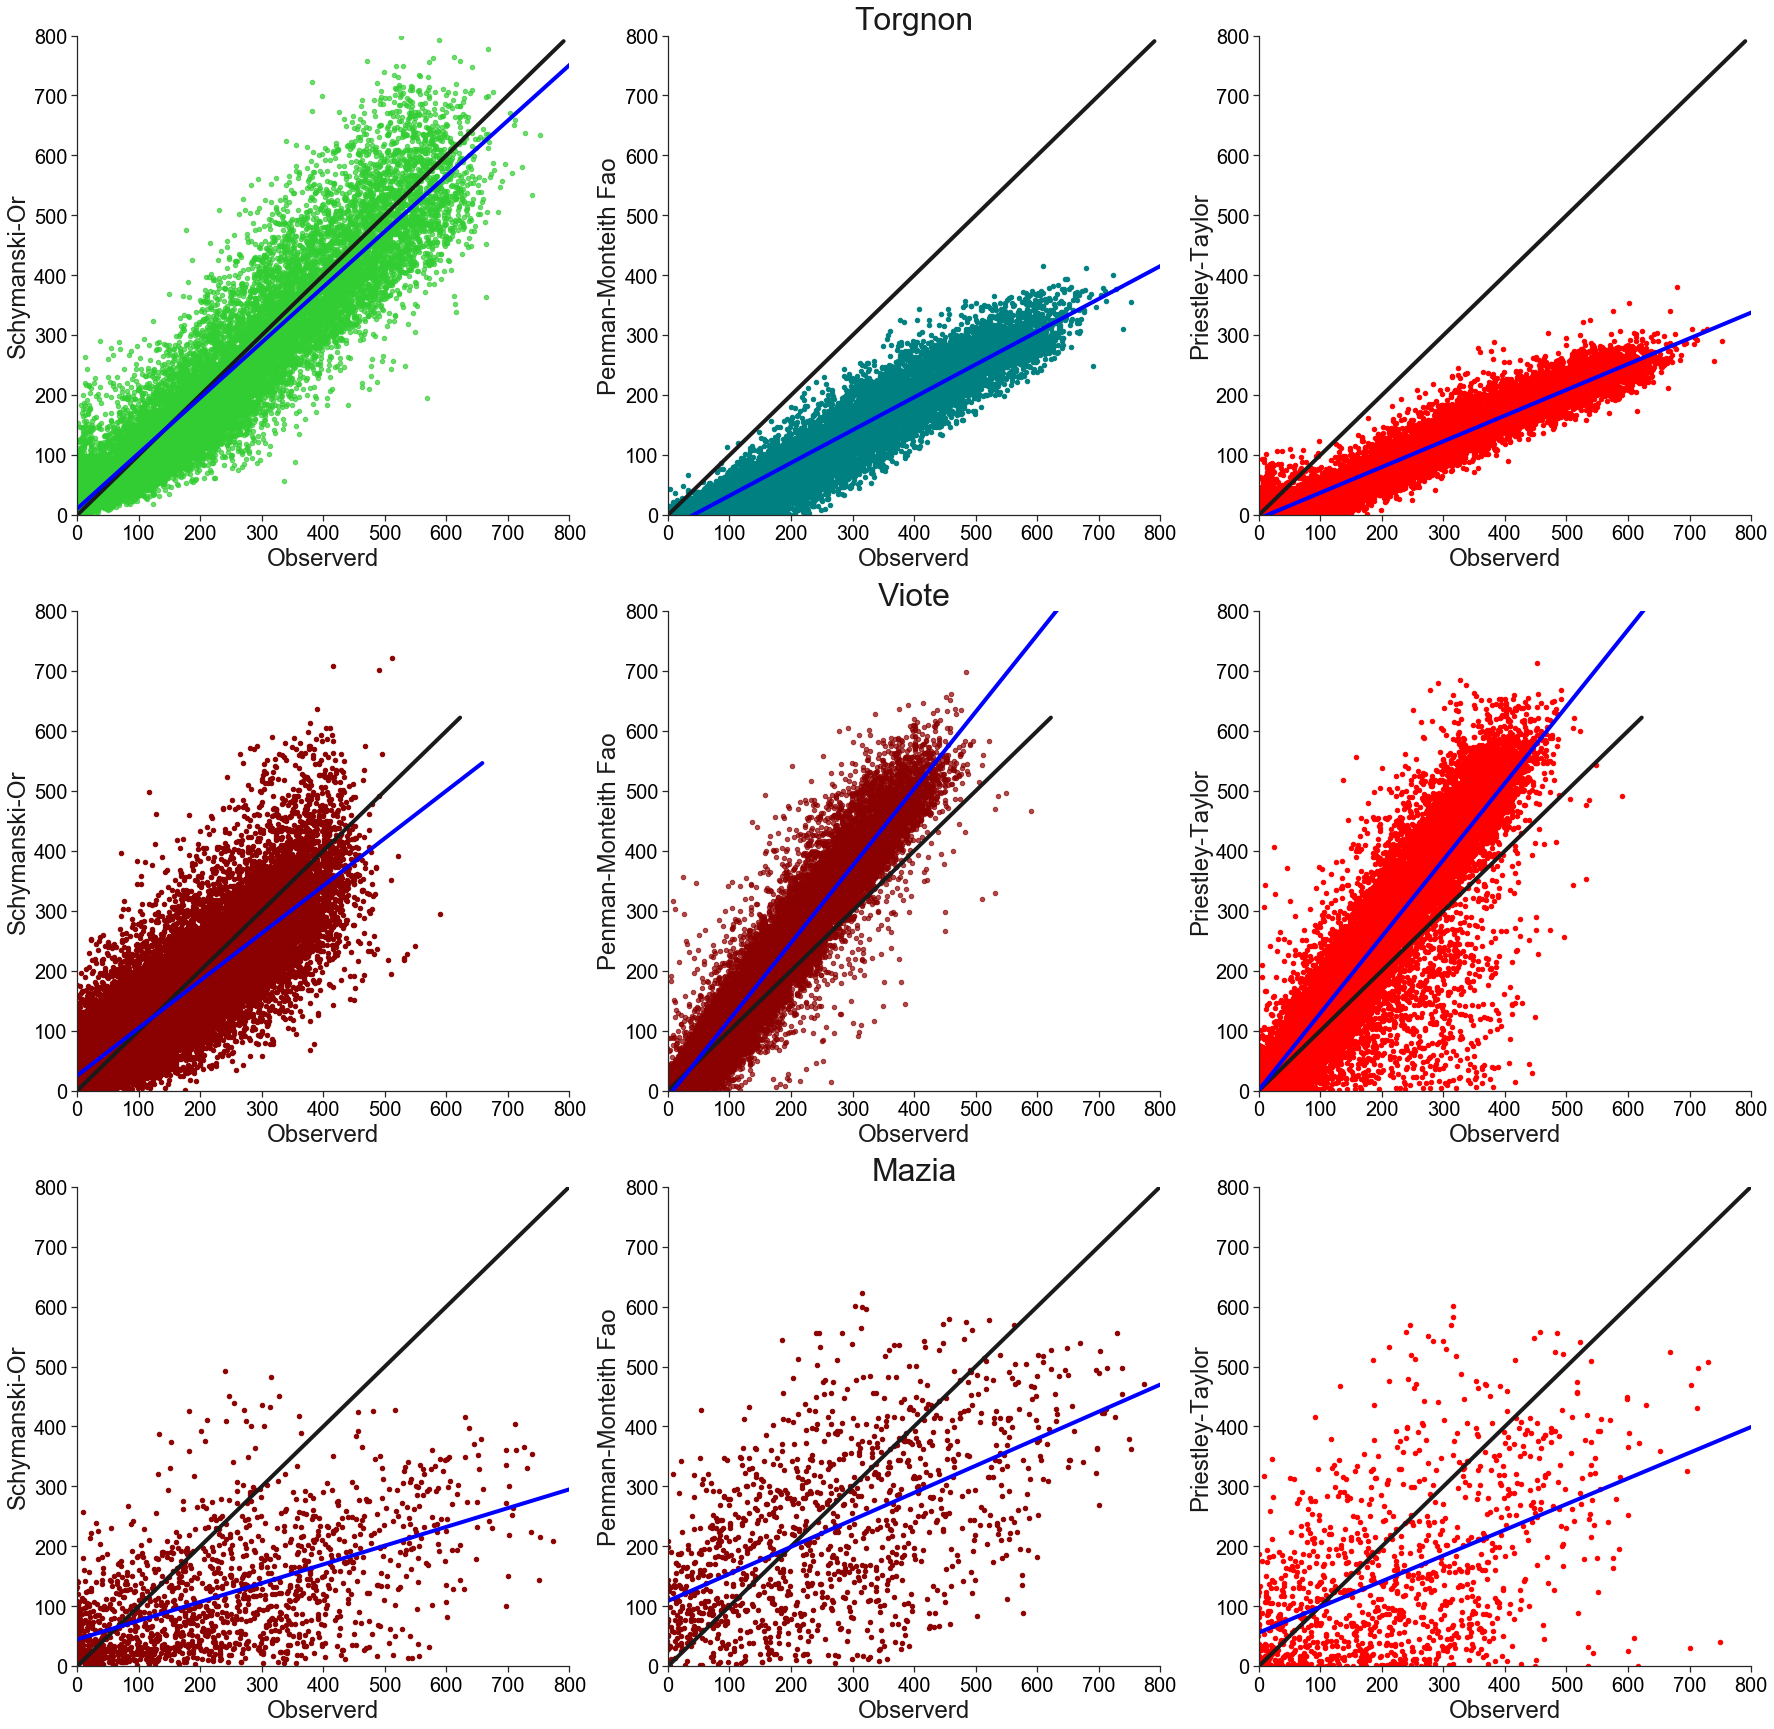

In [30]:
g, axes = plt.subplots(nrows=3, ncols=3)
ax11 = axes[0][0]  
ax12 = axes[0][1]  
ax13 = axes[0][2] 
ax21 = axes[1][0]  
ax22 = axes[1][1]  
ax23 = axes[1][2] 
ax31 = axes[2][0]  
ax32 = axes[2][1]  
ax33 = axes[2][2] 
#  	faoTBow 	ptTBow 	soTBow 	faoVBow 	ptVBow 	soVBow 	faoMBow 	ptMBow 	soMBow 	obsT 	obsV 	obsM

sns.set(style="ticks")
##################            TORGNON            #############################
g = sns.regplot(x=dfValues['obsT'], y=dfValues['obsT'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax11,marker="o")
g = sns.regplot(x=dfValues['obsT'], y=dfValues['soTBow'], ci = False,scatter_kws={"color":"limegreen","alpha":0.7,"s":20},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax11,marker="o")
##################            TORGNON            #############################

g = sns.regplot(x=dfValues['obsT'], y=dfValues['obsT'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax12,marker="o")
g = sns.regplot(x=dfValues['obsT'], y=dfValues['ptTBow'], ci = False,scatter_kws={"color":"teal","alpha":1,"s":20},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax12,marker="o")
g.axes.set_title('Torgnon', fontsize=32,color="k",alpha=1)
##################            TORGNON            #############################

g = sns.regplot(x=dfValues['obsT'], y=dfValues['obsT'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax13,marker="o")
g = sns.regplot(x=dfValues['obsT'], y=dfValues["faoTBow"], ci = False,scatter_kws={"color":"red","alpha":1,"s":20},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax13,marker="o")
################################################################################

##################            VIOTE            #############################
g = sns.regplot(x=dfValues['obsV'], y=dfValues['obsV'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax21,marker="o")
g = sns.regplot(x=dfValues['obsV'], y=dfValues['soVBow'], ci = False,scatter_kws={"color":"darkred","alpha":1,"s":20},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax21,marker="o")
##################            VIOTE            #############################

g = sns.regplot(x=dfValues['obsV'], y=dfValues['obsV'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax22,marker="o")
g = sns.regplot(x=dfValues['obsV'], y=dfValues['ptVBow'], ci = False,scatter_kws={"color":"darkred","alpha":0.7,"s":20},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax22,marker="o")
g.axes.set_title('Viote', fontsize=32,color="k",alpha=1)
##################            VIOTE            #############################

g = sns.regplot(x=dfValues['obsV'], y=dfValues['obsV'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax23,marker="o")
g = sns.regplot(x=dfValues['obsV'], y=dfValues["faoVBow"], ci = False,scatter_kws={"color":"red","alpha":1,"s":20},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax23,marker="o")
################################################################################


##################            MAZIA            #############################
g = sns.regplot(x=dfValues['obsM'], y=dfValues['obsM'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax31,marker="o")
g = sns.regplot(x=dfValues['obsM'], y=dfValues['soMBow'], ci = False,scatter_kws={"color":"darkred","alpha":1,"s":20},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax31,marker="o")
##################            MAZIA            #############################

g = sns.regplot(x=dfValues['obsM'], y=dfValues['obsM'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax32,marker="o")
g = sns.regplot(x=dfValues['obsM'], y=dfValues['ptMBow'], ci = False,scatter_kws={"color":"darkred","alpha":1,"s":20},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax32,marker="o")
g.axes.set_title('Mazia', fontsize=32,color="k",alpha=1)
##################            MAZIA            #############################

g = sns.regplot(x=dfValues['obsM'], y=dfValues['obsM'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax33,marker="o")
g = sns.regplot(x=dfValues['obsM'], y=dfValues["faoMBow"], ci = False,scatter_kws={"color":"red","alpha":1,"s":20},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax33,marker="o")
################################################################################
sns.despine()
ax11.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
ax12.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
ax13.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)

ax21.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
ax22.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
ax23.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)

ax31.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
ax32.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
ax33.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)
g.figure.set_size_inches(30,30)
for ax in [ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33]:
    ax.set_ylim([-0,800])
    ax.set_xlim([-0,800])
    ax.set_xlabel("Observerd",size = 24,color="k",alpha=1)
    ax.tick_params(labelsize=20,labelcolor="black")

In [31]:
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30,30))
# ax11 = axes[0][0]  
# ax12 = axes[0][1]  
# ax13 = axes[0][2] 
# ax21 = axes[1][0]  
# ax22 = axes[1][1]  
# ax23 = axes[1][2] 
# ax31 = axes[2][0]  
# ax32 = axes[2][1]  
# ax33 = axes[2][2] 

# plt.style.use('ggplot')
# diag_line, = ax11.plot(-100, 900, ls="--", c=".3")
# dfTot.plot(kind='scatter', x='obs', y='so', color='darkorange', ax=ax11,title='SO')
# dfTot.plot(kind='scatter', x='obs+bowerr', y='soBow', color='darkorange', ax=ax12,title='SO BOW')
# dfTot.plot(kind='scatter', x='obs+err', y='soRes', color='darkorange', ax=ax13,title='SO RES')

# dfTot.plot(kind='scatter', x='obs', y='fao', color='darkorange', ax=ax21,title='FAO')
# dfValues.plot(kind='scatter', x='obs+bowerr', y='faoBow', color='darkorange', ax=ax22,title='FAO BOW')
# dfTot.plot(kind='scatter', x='obs+err', y='faoRes', color='darkorange', ax=ax23,title='FAO RES')

# dfTot.plot(kind='scatter', x='obs', y='pt', color='darkorange', ax=ax31,title='PT')
# dfTot.plot(kind='scatter', x='obs+bowerr', y='ptBow', color='darkorange', ax=ax32,title='PT BOW')
# dfTot.plot(kind='scatter', x='obs+err', y='ptRes', color='darkorange', ax=ax33,title='PT RES')

# yticks = np.arange(start=-100, stop=1000, step=100)
# for ax in [ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33]:
#     ax.get_xaxis().set_ticks(yticks)
#     ax.yaxis.set_ticks(yticks)
#     ax.tick_params(axis='both', which='major', labelsize=20)
#    # ax.tick_params(axis = 'both', which = 'minor', labelsize = 15)
# fig.add_subplot(111, frameon=False);
# plt.grid(False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.xlabel("\n Latent heat observed + error [W/m2] \n", size=24, family='DejaVu Sans');   
# plt.ylabel("Latent heat simulated [W/m2] \n", size=24, family='DejaVu Sans');   

# plt.title("Latent heat \n", size=22, family='DejaVu Sans');
# plt.tight_layout()    

In [32]:
dfDiff.head()

errTFAO  errTPT  errTSO  errVFAO  errVPT  errVSO  \
Datetime                                                                
2005-05-01 00:00:00      NaN     NaN     NaN      NaN     NaN     NaN   
2005-05-01 00:30:00      NaN     NaN     NaN      NaN     NaN     NaN   
2005-05-01 01:00:00      NaN     NaN     NaN      NaN     NaN     NaN   
2005-05-01 01:30:00      NaN     NaN     NaN      NaN     NaN     NaN   
2005-05-01 02:00:00      NaN     NaN     NaN      NaN     NaN     NaN   

                     errMFAO  errMPT  errMSO  month  
Datetime                                             
2005-05-01 00:00:00      NaN     NaN     NaN      5  
2005-05-01 00:30:00      NaN     NaN     NaN      5  
2005-05-01 01:00:00      NaN     NaN     NaN      5  
2005-05-01 01:30:00      NaN     NaN     NaN      5  
2005-05-01 02:00:00      NaN     NaN     NaN      5

In [33]:
# monthIndex = calendar.month_name[5:10]
# monthIndex

In [34]:
dfRMSE = pd.DataFrame(index=[5,6,7,8,9], columns=['errTFAO','errTPT','errTSO','errVFAO','errVPT',
                                                  'errVSO','errMFAO','errMPT','errMSO'])

# dfDiffMo = dfDiff[['month']]
# for i in range(4, 11):
#     dfDiff[dfRMSE ==i]=calendar.month_name[i]#'June'

# dfDiff[['month']] = dfDiffMo
# dfDiff


In [35]:
list1 = [5,6,7,8,9]
list2 = ['errTFAO','errTPT','errTSO','errVFAO','errVPT','errVSO','errMFAO','errMPT','errMSO']
for count1 in list1:
    for count2 in list2:
        dfRMSE.at[count1,count2] =((dfDiff.loc[dfDiff['month'] == count1, count2])** 2).mean() ** .5

In [36]:
# dfRMSE.index =  monthIndex

In [37]:
dfRMSE.head()

errTFAO   errTPT   errTSO  errVFAO   errVPT   errVSO  errMFAO   errMPT  \
5  131.013  117.903  49.8883  102.152  90.4032  62.4449  328.344  193.647   
6  172.907  162.199  63.8408  82.5532   67.699    70.21      NaN      NaN   
7   197.96  185.123  72.2903  100.564  74.7641  74.9728  158.498  166.569   
8  186.576  174.091  65.3668  83.8773  62.7801  59.2779  161.622  180.558   
9  138.262  129.321  56.8615  65.4956  48.7925  51.6708  160.577  131.407   

    errMSO  
5  212.913  
6      NaN  
7  181.646  
8  218.458  
9  141.533

In [38]:
dfRMSE.columns = ['RMSE_TFAO','RMSE_TPT','RMSE_TSO','RMSE_VFAO','RMSE_VPT','RMSE_VSO','RMSE_MFAO','RMSE_MPT','RMSE_MSO']
dfRMSE

RMSE_TFAO RMSE_TPT RMSE_TSO RMSE_VFAO RMSE_VPT RMSE_VSO RMSE_MFAO RMSE_MPT  \
5   131.013  117.903  49.8883   102.152  90.4032  62.4449   328.344  193.647   
6   172.907  162.199  63.8408   82.5532   67.699    70.21       NaN      NaN   
7    197.96  185.123  72.2903   100.564  74.7641  74.9728   158.498  166.569   
8   186.576  174.091  65.3668   83.8773  62.7801  59.2779   161.622  180.558   
9   138.262  129.321  56.8615   65.4956  48.7925  51.6708   160.577  131.407   

  RMSE_MSO  
5  212.913  
6      NaN  
7  181.646  
8  218.458  
9  141.533

In [39]:
from matplotlib import dates

In [40]:
dfRMSE['mesi']=['2005-05-01','2005-06-01','2005-07-01','2005-08-01','2005-09-01']
dfRMSE['mesi'] = pd.to_datetime(dfRMSE['mesi'], dayfirst=True)
dfRMSE['mesi'] = dfRMSE['mesi'].dt.strftime('%b')

In [41]:
# dfRMSE.index = dfRMSE['mesi']
import calendar

In [42]:
dfRMSE.head()

RMSE_TFAO RMSE_TPT RMSE_TSO RMSE_VFAO RMSE_VPT RMSE_VSO RMSE_MFAO RMSE_MPT  \
5   131.013  117.903  49.8883   102.152  90.4032  62.4449   328.344  193.647   
6   172.907  162.199  63.8408   82.5532   67.699    70.21       NaN      NaN   
7    197.96  185.123  72.2903   100.564  74.7641  74.9728   158.498  166.569   
8   186.576  174.091  65.3668   83.8773  62.7801  59.2779   161.622  180.558   
9   138.262  129.321  56.8615   65.4956  48.7925  51.6708   160.577  131.407   

  RMSE_MSO mesi  
5  212.913  May  
6      NaN  Jun  
7  181.646  Jul  
8  218.458  Aug  
9  141.533  Sep

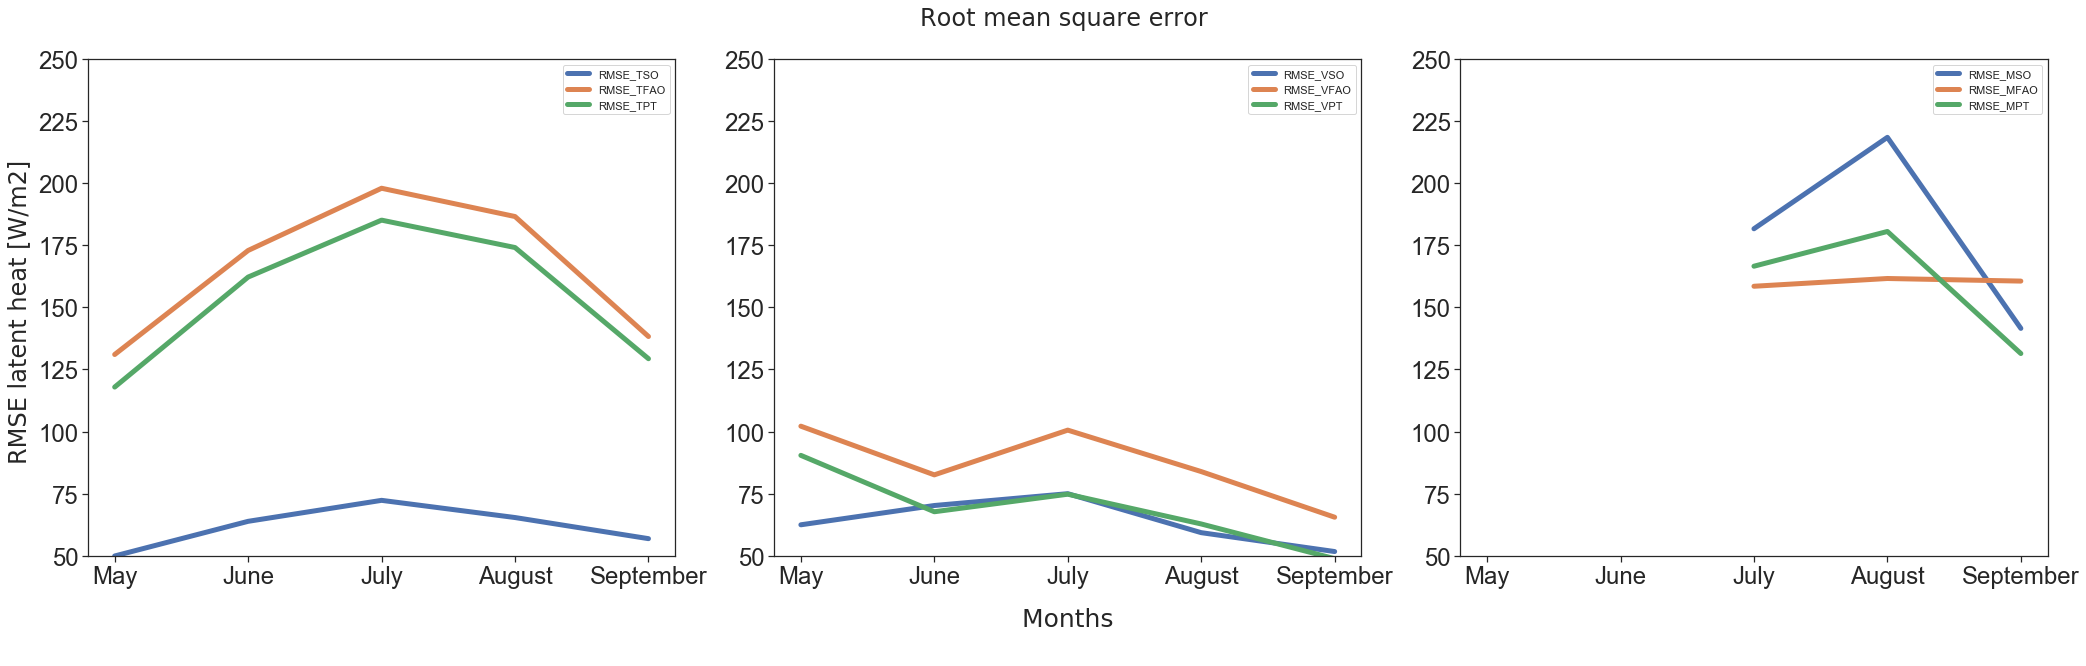

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
ax11 = axes[0]
ax12 = axes[1] 
ax13 = axes[2] 

dfRMSE.plot(ax=ax11,y=['RMSE_TSO','RMSE_TFAO','RMSE_TPT'],kind='line', stacked=False,
              label=['RMSE_TSO','RMSE_TFAO','RMSE_TPT'],linewidth=5)               
dfRMSE.plot(ax=ax12,y=['RMSE_VSO','RMSE_VFAO','RMSE_VPT'],kind='line', stacked=False,
              label=['RMSE_VSO','RMSE_VFAO','RMSE_VPT'],linewidth=5) 
dfRMSE.plot(ax=ax13,y=['RMSE_MSO','RMSE_MFAO','RMSE_MPT'],kind='line', stacked=False,
              label=['RMSE_MSO','RMSE_MFAO','RMSE_MPT'],linewidth=5) 

xticks = np.arange(start=5, stop=10, step=1)
yticks = np.arange(start=50, stop=351, step=50)
for ax in [ax11, ax12, ax13]:
    ax.set_ylim((50,250))
    labels = calendar.month_name[5:10]
    ax.set_xticks(np.arange(start=5, stop=10, step=1))
    ax.set_xticklabels(labels)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
    
fig.add_subplot(111, frameon=False);
plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("\n Months \n", size=25, family='DejaVu Sans');   
plt.ylabel("RMSE latent heat [W/m2] \n", size=24, family='DejaVu Sans');   

plt.title("Root mean square error \n", size=24, family='DejaVu Sans');
plt.tight_layout()    

In [44]:
# dividi RMSE per valore medio di flusso // coefficiente di variazione

In [45]:
print(dfRMSE.mean())
print(dfRMSE.sum())

RMSE_TFAO    165.343823
RMSE_TPT     153.727555
RMSE_TSO      61.649528
RMSE_VFAO     86.928541
RMSE_VPT      68.887788
RMSE_VSO      63.715273
RMSE_MFAO    202.260236
RMSE_MPT     168.045289
RMSE_MSO     188.637563
dtype: float64
RMSE_TFAO            826.719
RMSE_TPT             768.638
RMSE_TSO             308.248
RMSE_VFAO            434.643
RMSE_VPT             344.439
RMSE_VSO             318.576
RMSE_MFAO            809.041
RMSE_MPT             672.181
RMSE_MSO              754.55
mesi         MayJunJulAugSep
dtype: object


In [46]:
# RMSE_SO = ((dfValues['so'] - dfValues['obs'])** 2).mean() ** .5
# #RMSE_SO = ((dfValues['so stress'] - dfValues['obs'])** 2).mean() ** .5
# RMSE_FAO = ((dfValues['fao'] - dfValues['obs'])** 2).mean() ** .5
# RMSE_PT = ((dfValues['pt'] - dfValues['obs'])** 2).mean() ** .5
# print(RMSE_SO,RMSE_FAO,RMSE_PT)
# print(RMSE_SO/680,RMSE_FAO/680,RMSE_PT/680)

In [47]:
dfMAE = pd.DataFrame(index=[5,6,7,8,9], columns=['errTFAO','errTPT','errTSO','errVFAO','errVPT',
                                                  'errVSO','errMFAO','errMPT','errMSO'])

In [48]:
list1 = [5,6,7,8,9]
list2 = ['errTFAO','errTPT','errTSO','errVFAO','errVPT','errVSO','errMFAO','errMPT','errMSO']
for count1 in list1:
    for count2 in list2:
        dfMAE.at[count1,count2] =((dfDiff.loc[dfDiff['month'] == count1, count2])).mean()

In [49]:
dfMAE.columns = ['MAE_TFAO','MAE_TPT','MAE_TSO','MAE_VFAO','MAE_VPT','MAE_VSO','MAE_MFAO','MAE_MPT','MAE_MSO']
dfMAE

MAE_TFAO  MAE_TPT  MAE_TSO MAE_VFAO  MAE_VPT  MAE_VSO MAE_MFAO  MAE_MPT  \
5  109.921  103.263  36.1355  79.1178  70.1883   46.561  251.288  154.137   
6  145.166  140.937  46.9145  63.3805  53.1303   53.491      NaN      NaN   
7  170.297  166.372  56.0864  78.6735  57.3431  57.3853  130.288  138.202   
8  159.349  154.795  50.1182  64.8679  48.9052  46.2347  129.602  146.705   
9  117.382  112.985   44.056  50.8474  38.1058  40.3887  126.257  107.195   

   MAE_MSO  
5  159.543  
6      NaN  
7    135.5  
8  171.616  
9  105.154

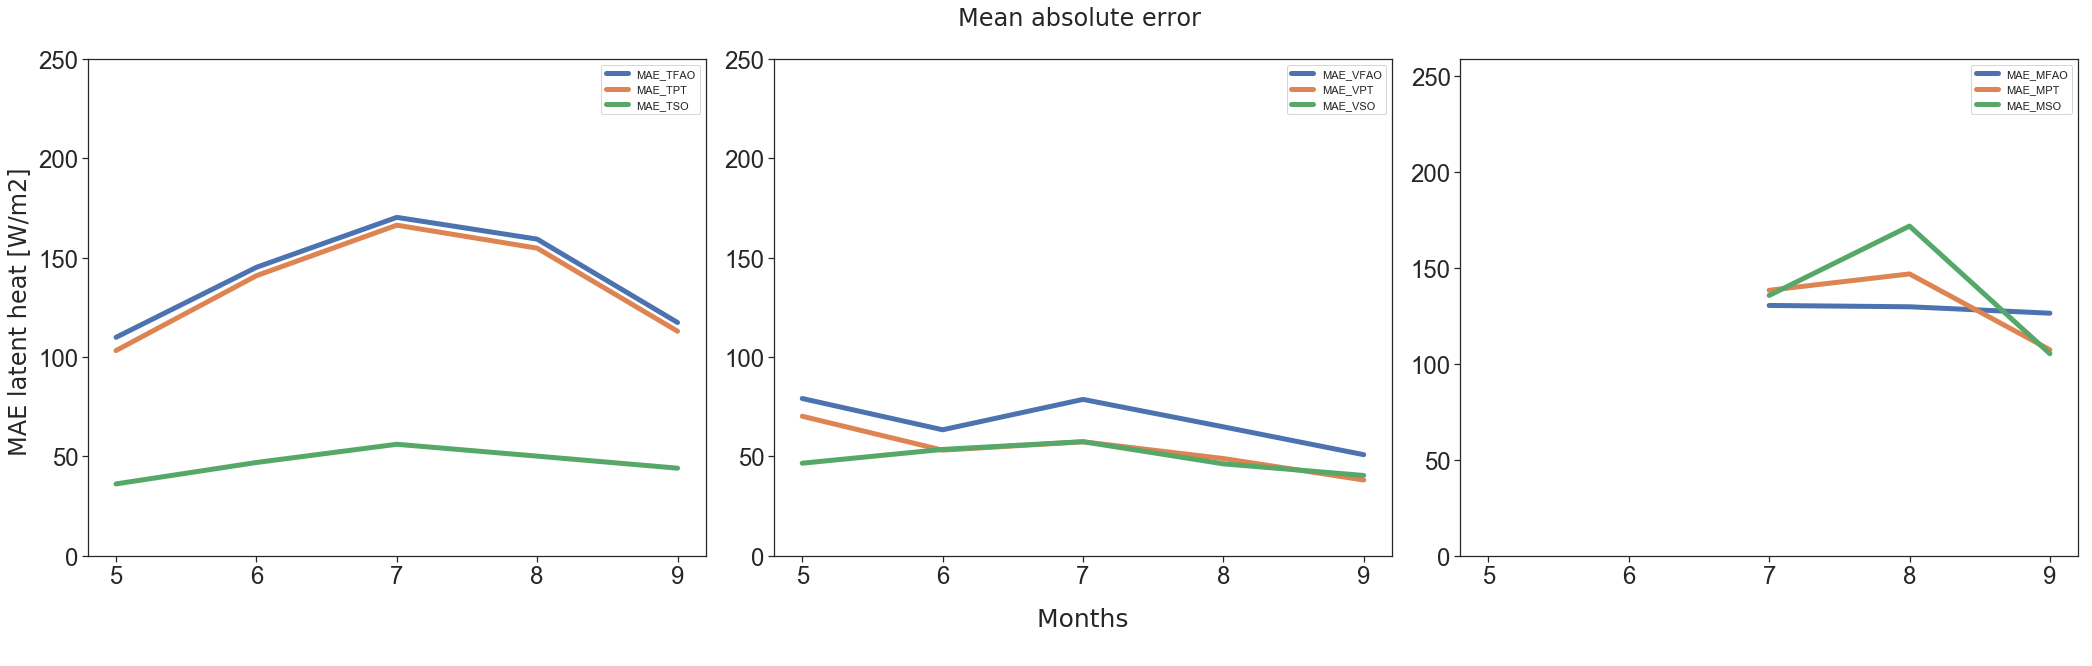

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
ax11 = axes[0]
ax12 = axes[1] 
ax13 = axes[2] 

dfMAE.plot(ax=ax11,y=['MAE_TFAO','MAE_TPT','MAE_TSO'],kind='line', stacked=False,
              label=['MAE_TFAO','MAE_TPT','MAE_TSO'],linewidth=5)               
dfMAE.plot(ax=ax12,y=['MAE_VFAO','MAE_VPT','MAE_VSO'],kind='line', stacked=False,
              label=['MAE_VFAO','MAE_VPT','MAE_VSO'],linewidth=5) 
dfMAE.plot(ax=ax13,y=['MAE_MFAO','MAE_MPT','MAE_MSO'],kind='line', stacked=False,
              label=['MAE_MFAO','MAE_MPT','MAE_MSO'],linewidth=5) 

xticks = np.arange(start=5, stop=10, step=1)
yticks = np.arange(start=0, stop=300, step=50)
for ax in [ax11, ax12, ax13]:
    ax.get_xaxis().set_ticks(xticks)
    ax.yaxis.set_ticks(yticks)


    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
fig.add_subplot(111, frameon=False);
plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("\n Months \n", size=25, family='DejaVu Sans');   
plt.ylabel("MAE latent heat [W/m2] \n", size=24, family='DejaVu Sans');   

plt.title("Mean absolute error \n", size=24, family='DejaVu Sans');
plt.tight_layout()    

In [51]:
print(dfMAE.mean())
print(dfMAE.sum())

MAE_TFAO    140.423066
MAE_TPT     135.670536
MAE_TSO      46.662132
MAE_VFAO     67.377405
MAE_VPT      53.534544
MAE_VSO      48.812131
MAE_MFAO    159.358767
MAE_MPT     136.560114
MAE_MSO     142.953152
dtype: float64
MAE_TFAO    702.115331
MAE_TPT     678.352679
MAE_TSO     233.310662
MAE_VFAO    336.887025
MAE_VPT     267.672720
MAE_VSO     244.060654
MAE_MFAO    637.435068
MAE_MPT     546.240457
MAE_MSO     571.812609
dtype: float64


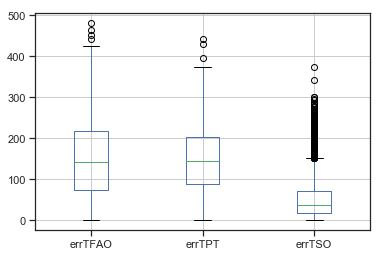

In [52]:
dfDiff.iloc[:,:3].boxplot()

In [53]:
print(dfValues['faoTBow'].corr(dfValues['obsT']))
print(dfValues['ptTBow'].corr(dfValues['obsT']))
print(dfValues['soTBow'].corr(dfValues['obsT']))
print('---------------------')
print(dfValues['faoVBow'].corr(dfValues['obsV']))
print(dfValues['ptVBow'].corr(dfValues['obsV']))
print(dfValues['soVBow'].corr(dfValues['obsV']))
print('---------------------')
print(dfValues['faoMBow'].corr(dfValues['obsM']))
print(dfValues['ptMBow'].corr(dfValues['obsM']))
print(dfValues['soMBow'].corr(dfValues['obsM']))

0.957072131738911
0.9417134922691481
0.9263380174432254
---------------------
0.914381065213387
0.951613153925223
0.8488968832777699
---------------------
0.5116224337665686
0.5748674604771288
0.5849048251952557


In [54]:
dfCorr = pd.DataFrame(index=[5,6,7,8,9,10], columns=['CORR_TFAO','CORR_TPT','CORR_TSO','CORR_VFAO','CORR_VPT','CORR_VSO',
                                                  'CORR_MFAO','CORR_MPT','CORR_MSO'])

In [55]:
print(dfValues['faoVBow'].corr(dfValues['obsV'].loc[dfValues['month'] == 5]))
print(dfValues['faoTBow'].corr(dfValues['obsT'].loc[dfValues['month'] == 6]))

0.9172990442127106
0.9519839803658157


In [56]:
list1 = [5,6,7,8,9,10]
for count1 in list1:
    dfCorr.at[count1,'CORR_TFAO']=dfValues['faoTBow'].corr(dfValues['obsT'].loc[dfValues['month'] == count1])
    dfCorr.at[count1,'CORR_TPT'] =dfValues['ptTBow'].corr(dfValues['obsT'].loc[dfValues['month'] == count1]) 
    dfCorr.at[count1,'CORR_TSO'] =dfValues['soTBow'].corr(dfValues['obsT'].loc[dfValues['month'] == count1]) 
    dfCorr.at[count1,'CORR_VFAO']=dfValues['faoVBow'].corr(dfValues['obsV'].loc[dfValues['month'] == count1]) 
    dfCorr.at[count1,'CORR_VPT'] =dfValues['ptVBow'].corr(dfValues['obsV'].loc[dfValues['month'] == count1]) 
    dfCorr.at[count1,'CORR_VSO'] =dfValues['soVBow'].corr(dfValues['obsV'].loc[dfValues['month'] == count1]) 
    dfCorr.at[count1,'CORR_MFAO']=dfValues['faoMBow'].corr(dfValues['obsM'].loc[dfValues['month'] == count1]) 
    dfCorr.at[count1,'CORR_MPT'] =dfValues['ptMBow'].corr(dfValues['obsM'].loc[dfValues['month'] == count1]) 
    dfCorr.at[count1,'CORR_MSO'] =dfValues['soMBow'].corr(dfValues['obsM'].loc[dfValues['month'] == count1])
           
    
#     dfValues['faoVBow'].corr(dfValues['obsV']))
#     dfCorr.at[count1,count2] =((dfValues.loc[dfValues['month'] == count1, count2])** 2).mean() ** .5
#    for count2 in list2:
#             stringa = 'CORR_'+count2+"FAO"
#             dfValues[stringa].corr(dfValues['obsV'].loc[dfValues['month'] == 5])#count1])

dfCorr

CORR_TFAO  CORR_TPT  CORR_TSO CORR_VFAO  CORR_VPT  CORR_VSO CORR_MFAO  \
5   0.960425   0.94175  0.937499  0.917299   0.91279  0.848242  0.432051   
6   0.951984  0.931493  0.928174  0.912923  0.964089  0.830871       NaN   
7   0.962788    0.9532  0.922247  0.919567  0.956255  0.824707  0.553463   
8   0.962809    0.9477  0.929364  0.899222  0.960679  0.865568  0.673907   
9    0.93684  0.922654  0.911005  0.908069  0.952779  0.865831  0.408497   
10       NaN       NaN       NaN  0.901181  0.900585  0.814919  0.529916   

    CORR_MPT  CORR_MSO  
5   0.628097  0.701924  
6        NaN       NaN  
7    0.51661  0.340963  
8   0.610256  0.670446  
9   0.492163  0.563143  
10  0.480985  0.461553

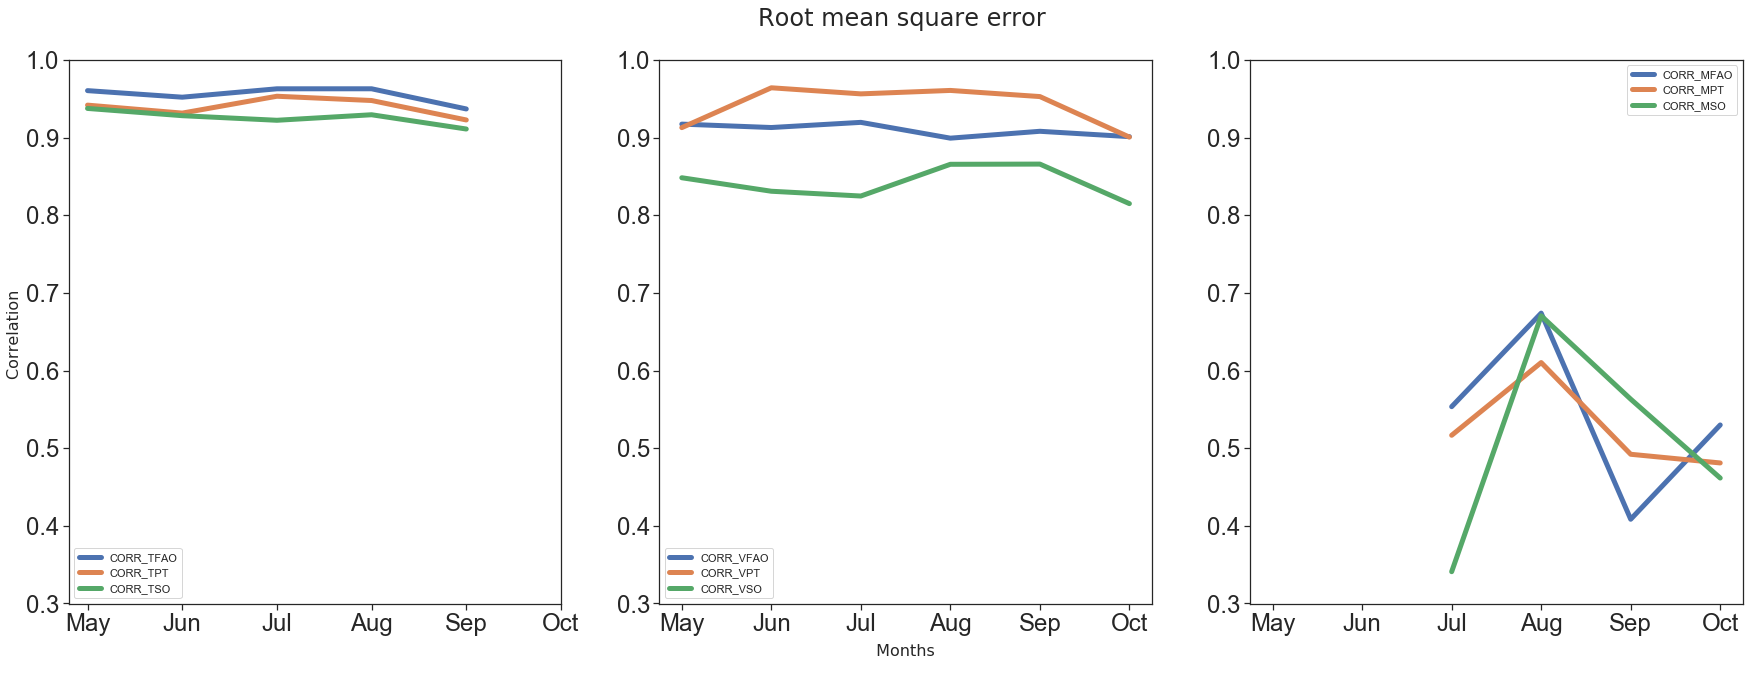

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
ax11 = axes[0]
ax12 = axes[1] 
ax13 = axes[2] 

dfCorr.plot(ax=ax11,y=['CORR_TFAO','CORR_TPT','CORR_TSO'],kind='line', stacked=False,
              label=['CORR_TFAO','CORR_TPT','CORR_TSO'],linewidth=5)               
dfCorr.plot(ax=ax12,y=['CORR_VFAO','CORR_VPT','CORR_VSO'],kind='line', stacked=False,
              label=['CORR_VFAO','CORR_VPT','CORR_VSO'],linewidth=5) 
dfCorr.plot(ax=ax13,y=['CORR_MFAO','CORR_MPT','CORR_MSO'],kind='line', stacked=False,
              label=['CORR_MFAO','CORR_MPT','CORR_MSO'],linewidth=5) 

# xticks = np.arange(start=5, stop=10, step=1)
for ax in [ax11, ax12, ax13]:
    ax.set_ylim((0.3,1.0))
    labels = calendar.month_abbr[5:11]
    ax.set_xticks(np.arange(start=5, stop=11, step=1))
    ax.set_xticklabels(labels)
#     ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
fig.add_subplot(111, frameon=False);
plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("\n Months \n", size=16, family='DejaVu Sans');   
plt.ylabel("Correlation \n", size=16, family='DejaVu Sans');   

plt.title("Root mean square error \n", size=24, family='DejaVu Sans');
plt.show()#tight_layout()    



In [58]:
# cumulato mensile annuale --> in millimetri

In [59]:
# analizza ciclo diurno medio --> estrai tutti i dati alle 12, alle 13 etc

In [60]:
# dfSoP = dfDiff.set_index(['month',dfDiff.index])['errtSO']#.unstack()

In [61]:
import seaborn as sns

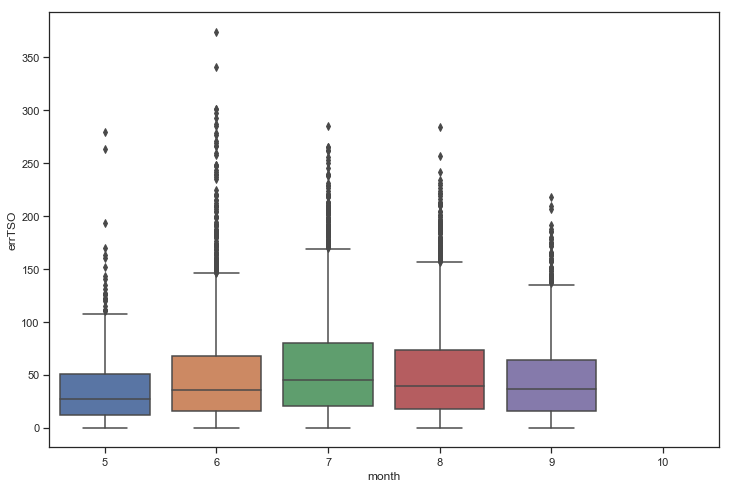

In [62]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches((12,8))
sns.boxplot(x='month',y='errTSO',data=dfDiff,ax=ax)
#sns.boxplot(x='month',y='errPT',data=dfDiff,ax=ax)

plt.show()

In [63]:
# # plt.style.use('ggplot')
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
# ax11 = axes[0]
# ax12 = axes[1] 
# ax13 = axes[2] 
# sns.boxplot(x='month',y='errTSO',data=dfValues,ax=ax11,palette="Set2",linewidth=3.5)
# sns.boxplot(x='month',y='errTPT',data=dfValues,ax=ax12)
# sns.boxplot(x='month',y='errTSO',data=dfValues,ax=ax13)

# yticks = np.arange(start=-100, stop=800, step=100)
# for ax in [ax11, ax12, ax13]:
#     #ax.get_xaxis().set_ticks()
#     ax.yaxis.set_ticks(yticks)
#     ax.tick_params(axis='both', which='major', labelsize=20)
#    # ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
# fig.add_subplot(111, frameon=False);
# plt.grid(False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.xlabel("Latent heat observed + error [W/m2] \n", size=15, family='DejaVu Sans');   
# plt.ylabel("Latent heat simulated [W/m2] \n", size=15, family='DejaVu Sans');   

# plt.title("Deviation \n", size=22, family='DejaVu Sans');
# plt.tight_layout()

In [64]:
dfDiffT = dfDiff[['errTFAO','errTPT','errTSO','month']]
dfDiffV = dfDiff[['errVFAO','errVPT','errVSO','month']]
dfDiffM = dfDiff[['errMFAO','errMPT','errMSO','month']]

dfDiffT.head()

errTFAO  errTPT  errTSO  month
Datetime                                           
2005-05-01 00:00:00      NaN     NaN     NaN      5
2005-05-01 00:30:00      NaN     NaN     NaN      5
2005-05-01 01:00:00      NaN     NaN     NaN      5
2005-05-01 01:30:00      NaN     NaN     NaN      5
2005-05-01 02:00:00      NaN     NaN     NaN      5

In [65]:
dataT = dfDiffT.melt(id_vars=['month'], var_name='Method', value_name='Deviation [W/m2]')
dataV = dfDiffV.melt(id_vars=['month'], var_name='Method', value_name='Deviation [W/m2]')
dataM = dfDiffM.melt(id_vars=['month'], var_name='Method', value_name='Deviation [W/m2]')

In [66]:
dataV

month   Method  Deviation [W/m2]
0           5  errVFAO               NaN
1           5  errVFAO               NaN
2           5  errVFAO               NaN
3           5  errVFAO               NaN
4           5  errVFAO               NaN
5           5  errVFAO               NaN
6           5  errVFAO               NaN
7           5  errVFAO               NaN
8           5  errVFAO               NaN
9           5  errVFAO               NaN
10          5  errVFAO               NaN
11          5  errVFAO               NaN
12          5  errVFAO          3.860600
13          5  errVFAO          3.363943
14          5  errVFAO          8.762645
15          5  errVFAO         14.591032
16          5  errVFAO         37.233704
17          5  errVFAO         52.098065
18          5  errVFAO         84.493976
19          5  errVFAO        123.759180
20          5  errVFAO        140.839202
21          5  errVFAO        171.618911
22          5  errVFAO        230.756864
23          5  errVFAO        260.671457
24          5  errVFAO        245.680399
25          5  errVFAO        226.133445
26          5  errVFAO        241.310221
27          5  errVFAO        262.482374
28          5  errVFAO        237.482888
29          5  errVFAO        225.483232
...       ...      ...               ...
370914     10   errVSO               NaN
370915     10   errVSO               NaN
370916     10   errVSO               NaN
370917     10   errVSO               NaN
370918     10   errVSO               NaN
370919     10   errVSO               NaN
370920     10   errVSO               NaN
370921     10   errVSO               NaN
370922     10   errVSO               NaN
370923     10   errVSO               NaN
370924     10   errVSO               NaN
370925     10   errVSO               NaN
370926     10   errVSO               NaN
370927     10   errVSO               NaN
370928     10   errVSO               NaN
370929     10   errVSO               NaN
370930     10   errVSO               NaN
370931     10   errVSO               NaN
370932     10   errVSO               NaN
370933     10   errVSO               NaN
370934     10   errVSO               NaN
370935     10   errVSO               NaN
370936     10   errVSO               NaN
370937     10   errVSO               NaN
370938     10   errVSO               NaN
370939     10   errVSO               NaN
370940     10   errVSO               NaN
370941     10   errVSO               NaN
370942     10   errVSO               NaN
370943     10   errVSO               NaN

[370944 rows x 3 columns]

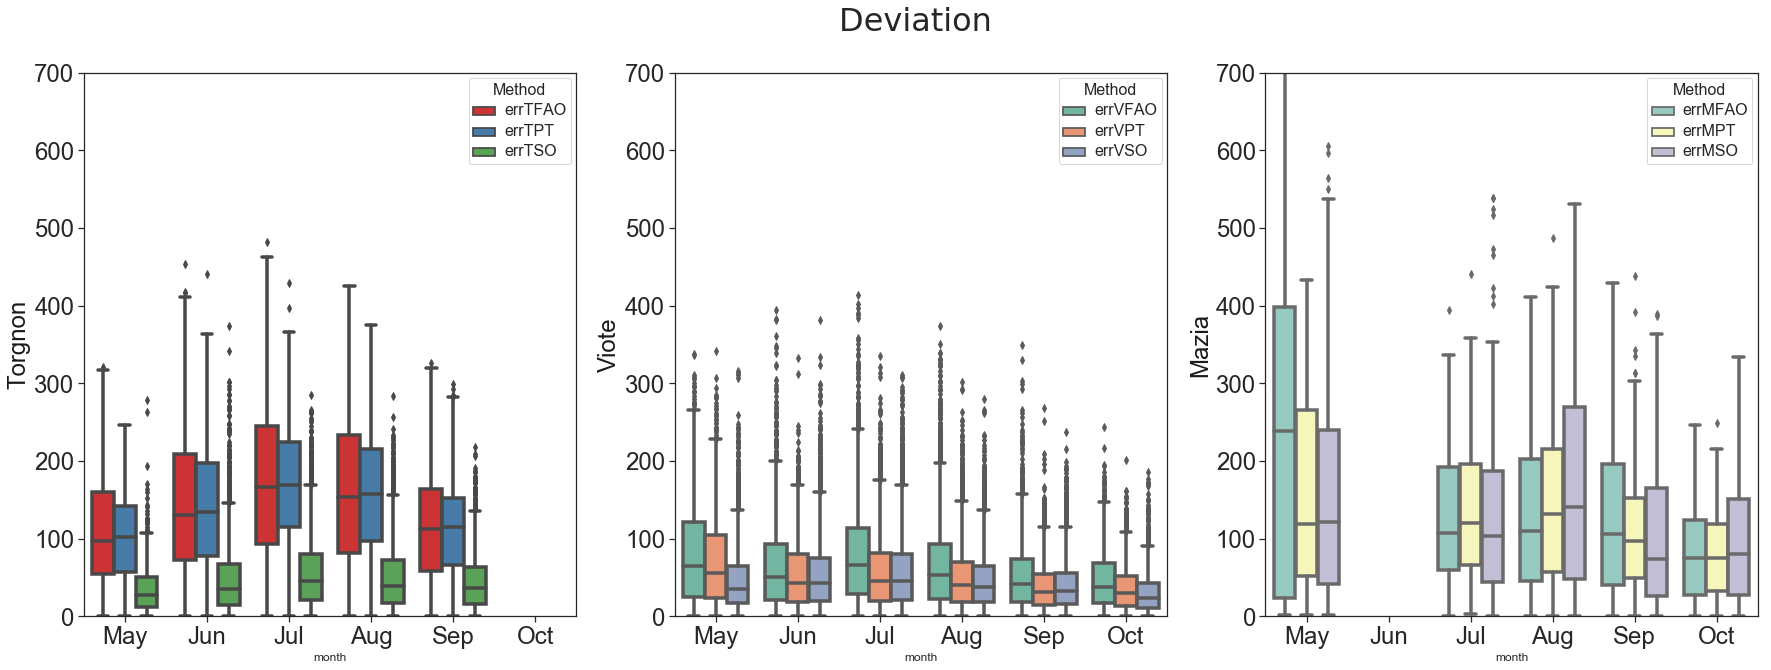

In [67]:
# fig, axes = plt.subplots(figsize=(30,20))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
ax11 = axes[0]
ax12 = axes[1] 
ax13 = axes[2] 
sns.boxplot(ax=ax11,data=dataT, x='month', y='Deviation [W/m2]', hue='Method',palette="Set1",linewidth=3.5)
sns.boxplot(ax=ax12,data=dataV, x='month', y='Deviation [W/m2]', hue='Method',palette="Set2",linewidth=3.5)
sns.boxplot(ax=ax13,data=dataM, x='month', y='Deviation [W/m2]', hue='Method',palette="Set3",linewidth=3.5)
sns.set_context("paper", rc={"axes.labelsize":24})



ax11.set_ylabel("Torgnon",size = 24,color="k",alpha=1)
ax12.set_ylabel("Viote",size = 24,color="k",alpha=1)
ax13.set_ylabel("Mazia",size = 24,color="k",alpha=1)

# ax21.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
# ax22.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
# ax23.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)

# ax31.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
# ax32.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
# ax33.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)
for ax in [ax11, ax12, ax13]:
    ax.set_ylim((0,700))
    labels = calendar.month_abbr[5:11]
    #ax.set_xticks(np.arange(start=5, stop=11, step=0.5))
    ax.set_xticklabels(labels)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
    plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title
#     ax.set_label(axis = 'both')  
fig.add_subplot(111, frameon=False);
plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.xlabel("Latent heat observed + error [W/m2] \n", size=15, family='DejaVu Sans');   
#plt.ylabel("Latent heat simulated [W/m2] \n", size=15, family='DejaVu Sans');   
# plt.legend(title='dataset', loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Deviation \n", size=32, family='DejaVu Sans');


# plt.tight_layout()

In [68]:
dfValues.head()

faoTBow  ptTBow  soTBow   faoVBow    ptVBow     soVBow  \
Datetime                                                                      
2005-05-01 00:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 00:30:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 01:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 01:30:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 02:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   

                     faoMBow  ptMBow  soMBow  obsT  obsV  obsM  month  
Datetime                                                               
2005-05-01 00:00:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 00:30:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 01:00:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 01:30:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 02:00:00      NaN     NaN     NaN   NaN   NaN   NaN      5

In [69]:
dfEt = (dfValues*3600)/2450000
dfValuesMonthly = dfEt.resample('MS').agg(['sum'])#dropna(how='any')
dfValuesMonthly[dfValuesMonthly ==-9999]=np.nan
dfValuesMonthly[dfValuesMonthly ==0]=np.nan

dfValuesMonthly.columns = ['faoTBow','ptTBow','soTBow','faoVBow','ptVBow','soVBow','faoMBow','ptMBow','soMBow','obsT','obsV','obsM','month']
# dfValuesMonthly

dfValuesCum = dfEt.resample('Y').agg(['cumsum'])#dropna(how='any')

dfValuesCum[dfValuesCum ==-9999]=np.nan
# dfValuesCum[dfValuesCum ==0]=np.nan

dfValuesCum.columns = ['faoTBow','ptTBow','soTBow','faoVBow','ptVBow','soVBow','faoMBow','ptMBow','soMBow','obsT','obsV','obsM','month']
# dfValuesMonthly

In [70]:
# dfValuesCum = (dfValuesCum*3600)/2450000

ValueError: When stacked is True, each column must be either all positive or negative.obsV contains both positive and negative values

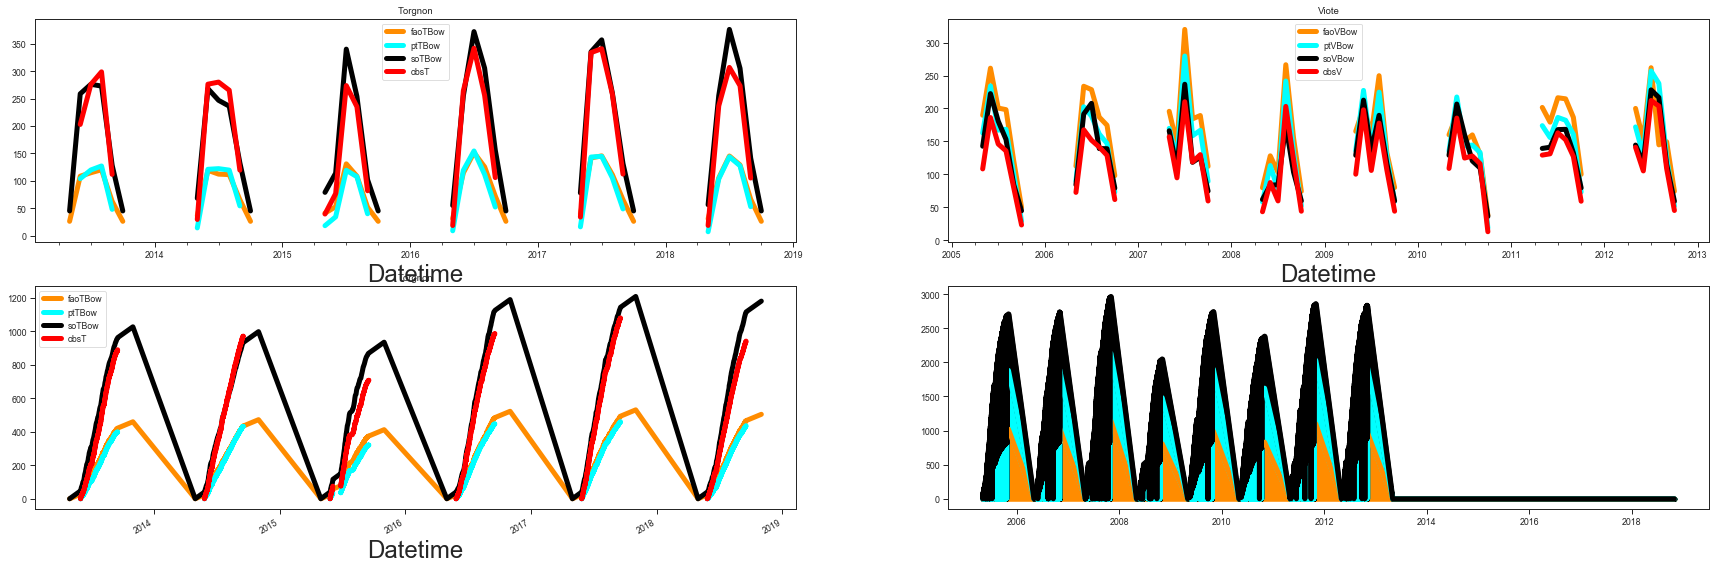

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,10))
# ax11 = axes[0] # ax12 = axes[1] # ax13 = axes[2] 

ax11 = axes[0][0] 
ax12 = axes[0][1] 
# ax13 = axes[0][2] 

ax21 = axes[1][0] 
ax22 = axes[1][1] 
# ax23 = axes[1][2]



dfValuesMonthly.plot(kind='line', y=['faoTBow','ptTBow','soTBow','obsT'], color=['darkorange','cyan','black','red'], 
           ax=ax11,title='Torgnon',linewidth=5) 
dfValuesMonthly.plot(kind='line', y=['faoVBow','ptVBow','soVBow','obsV'], color=['darkorange','cyan','black','red'], # color=['darkorange','cyan','black'],
           ax=ax12,  title='Viote',linewidth=5) 
# dfValuesMonthly.plot(kind='line', y=['faoMBow','ptMBow','soMBow','obsM'], color=['darkorange','cyan','black','red'],  #color=['darkorange','cyan','black'],
#            ax=ax13,title='Mazia') #s=dfDiff['errPT']/3)


dfValuesCum.plot(kind='line', y=['faoTBow','ptTBow','soTBow','obsT'], color=['darkorange','cyan','black','red'], 
           ax=ax21,title='Torgnon',linewidth=5) 
dfValuesCum.plot(kind='area', y=['faoVBow','ptVBow','soVBow','obsV'], color=['darkorange','cyan','black','red'], # color=['darkorange','cyan','black'],
           ax=ax22,  title='Viote',linewidth=5) 
# dfValuesCum.plot(kind='line', y=['faoMBow','ptMBow','soMBow','obsM'], color=['darkorange','cyan','black','red'],  #color=['darkorange','cyan','black'],
#            ax=ax23,title='Mazia') #s=dfDiff['errPT']/3)

# dfValuesMonthly.plot(kind='scatter', x=['obsV','obsV','obsV'], y=['faoVBow','ptVBow','soVBow'],# color=['darkorange','cyan','black'],
#            ax=ax12,  title='Viote') #s=dfDiff['errFAO']/3)
# dfValuesMonthly.plot(kind='scatter', x=['obsM','obsM','obsM'], y=['faoMBow','ptMBow','soMBow'], #color=['darkorange','cyan','black'],
#            ax=ax13,title='Mazia') #s=dfDiff['errPT']/3)
# yticks = np.arange(start=-100, stop=100, step=100)
# for ax in [ax11, ax12, ax13, ax21, ax22, ax23]:
for ax in [ax11, ax12, ax21, ax22]:
#     ax.get_xaxis().set_ticks(yticks)
#     ax.yaxis.set_ticks(yticks)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
fig.add_subplot(111, frameon=False);
plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Latent heat observed + error [W/m2] \n", size=15, family='DejaVu Sans');   
plt.ylabel("Latent heat simulated [W/m2] \n", size=15, family='DejaVu Sans');   

plt.title("Deviation \n", size=22, family='DejaVu Sans');
plt.tight_layout()    

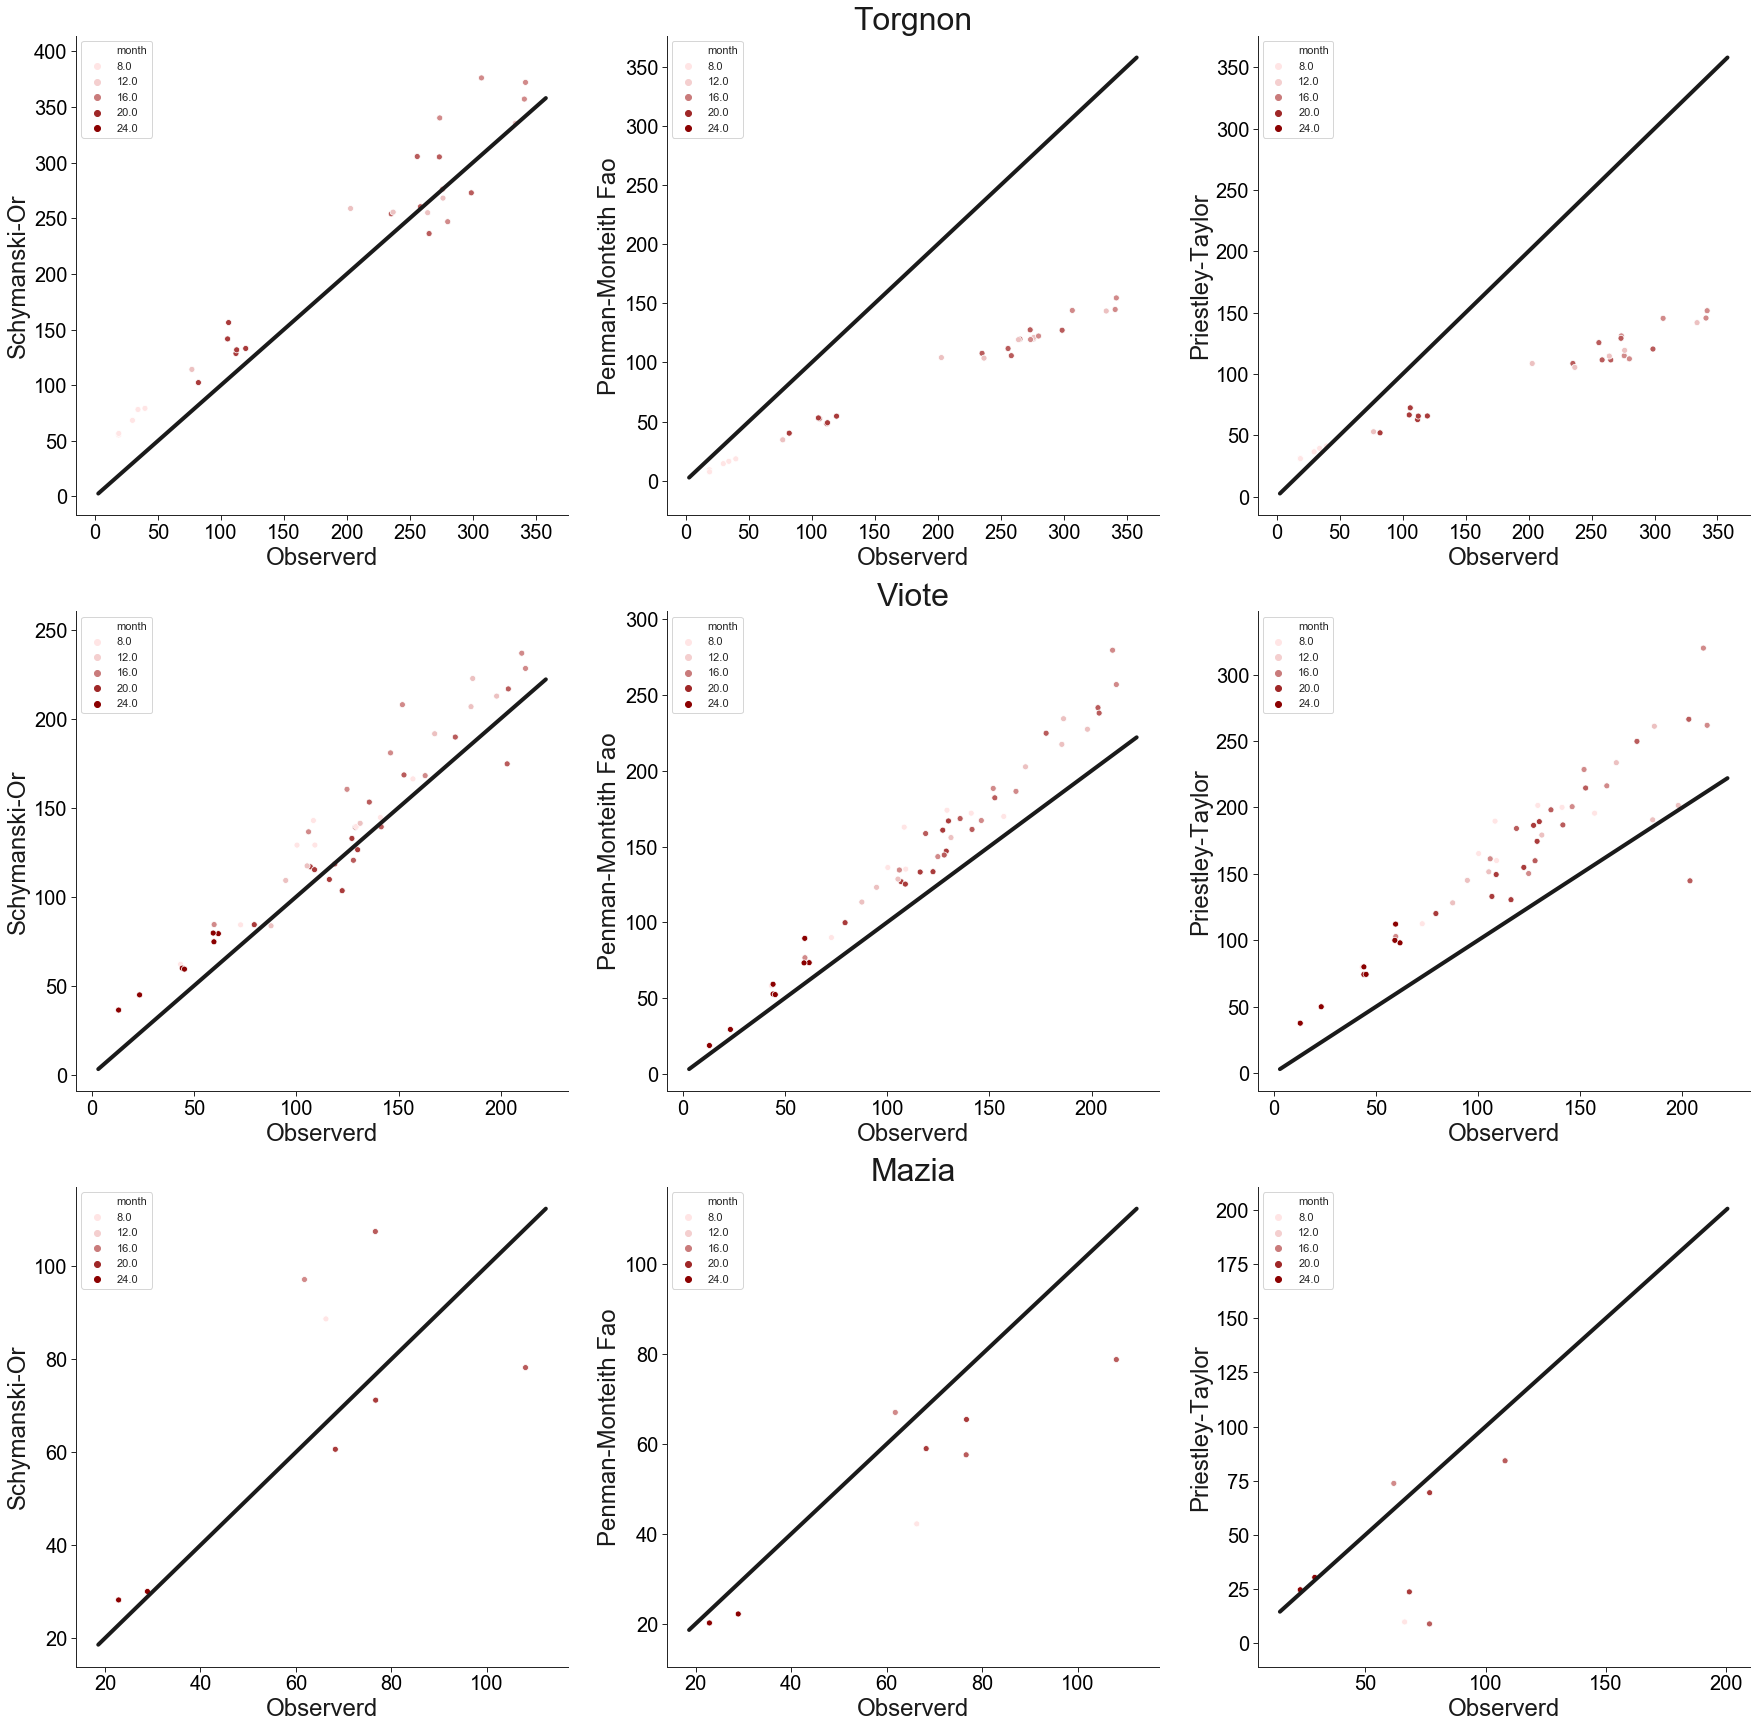

In [72]:
g, axes = plt.subplots(nrows=3, ncols=3)
ax11 = axes[0][0]  
ax12 = axes[0][1]  
ax13 = axes[0][2] 
ax21 = axes[1][0]  
ax22 = axes[1][1]  
ax23 = axes[1][2] 
ax31 = axes[2][0]  
ax32 = axes[2][1]  
ax33 = axes[2][2] 
#  	faoTBow 	ptTBow 	soTBow 	faoVBow 	ptVBow 	soVBow 	faoMBow 	ptMBow 	soMBow 	obsT 	obsV 	obsM

sns.set(style="ticks")
cmap = sns.light_palette("darkred", as_cmap=True)

#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

##################            TORGNON            #############################
g = sns.regplot(x=dfValuesMonthly['obsT'], y=dfValuesMonthly['obsT'], ci = False,
                scatter_kws={"color":"black","alpha":0.3,"s":0},line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax11,marker="o")
g = sns.scatterplot(x=dfValuesMonthly['obsT'], y=dfValuesMonthly['soTBow'],hue=dfValuesMonthly['month'], palette=cmap, ax=ax11, sizes=(50, 50))#
##################            TORGNON            #############################

g = sns.regplot(x=dfValuesMonthly['obsT'], y=dfValuesMonthly['obsT'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax12,marker="o")
g = sns.scatterplot(x=dfValuesMonthly['obsT'], y=dfValuesMonthly['ptTBow'],hue=dfValuesMonthly['month'], palette=cmap, ax=ax12, sizes=(20, 20))
g.axes.set_title('Torgnon', fontsize=32,color="k",alpha=1)
##################            TORGNON            #############################

g = sns.regplot(x=dfValuesMonthly['obsT'], y=dfValuesMonthly['obsT'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax13,marker="o")
g = sns.scatterplot(x=dfValuesMonthly['obsT'], y=dfValuesMonthly["faoTBow"],hue=dfValuesMonthly['month'], palette=cmap, ax=ax13, sizes=(20, 20))
################################################################################

##################            VIOTE            #############################
g = sns.regplot(x=dfValuesMonthly['obsV'], y=dfValuesMonthly['obsV'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax21,marker="o")
g = sns.scatterplot(x=dfValuesMonthly['obsV'], y=dfValuesMonthly['soVBow'],hue=dfValuesMonthly['month'], palette=cmap, ax=ax21, sizes=(20, 20))
##################            VIOTE            #############################

g = sns.regplot(x=dfValuesMonthly['obsV'], y=dfValuesMonthly['obsV'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax22,marker="o")
g = sns.scatterplot(x=dfValuesMonthly['obsV'], y=dfValuesMonthly['ptVBow'], hue=dfValuesMonthly['month'], palette=cmap, ax=ax22, sizes=(20, 20))
g.axes.set_title('Viote', fontsize=32,color="k",alpha=1)
##################            VIOTE            #############################

g = sns.regplot(x=dfValuesMonthly['obsV'], y=dfValuesMonthly['obsV'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax23,marker="o")
g = sns.scatterplot(x=dfValuesMonthly['obsV'], y=dfValuesMonthly["faoVBow"],hue=dfValuesMonthly['month'], palette=cmap, ax=ax23, sizes=(20, 20))
################################################################################


##################            MAZIA            #############################
g = sns.regplot(x=dfValuesMonthly['obsM'], y=dfValuesMonthly['obsM'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax31,marker="o")
g = sns.scatterplot(x=dfValuesMonthly['obsM'], y=dfValuesMonthly['soMBow'],hue=dfValuesMonthly['month'], palette=cmap, ax=ax31, sizes=(20, 20))
##################            MAZIA            #############################

g = sns.regplot(x=dfValuesMonthly['obsM'], y=dfValuesMonthly['obsM'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax32,marker="o")
g = sns.scatterplot(x=dfValuesMonthly['obsM'], y=dfValuesMonthly['ptMBow'], hue=dfValuesMonthly['month'], palette=cmap, ax=ax32, sizes=(20, 20))
g.axes.set_title('Mazia', fontsize=32,color="k",alpha=1)
##################            MAZIA            #############################

g = sns.regplot(x=dfValuesMonthly['obsM'], y=dfValuesMonthly['obsM'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax33,marker="o")
g = sns.scatterplot(x=dfValuesMonthly['obsM'], y=dfValuesMonthly["faoMBow"], hue=dfValuesMonthly['month'], palette=cmap, ax=ax33, sizes=(20, 20))
################################################################################
sns.despine()
ax11.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
ax12.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
ax13.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)

ax21.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
ax22.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
ax23.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)

ax31.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
ax32.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
ax33.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)
g.figure.set_size_inches(30,30)
for ax in [ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33]:
#     ax.set_ylim([-0,800])
#     ax.set_xlim([-0,800])
    
# g.set_ylim([-0,800])
# g.set_xlim([-0,800])

    ax.set_xlabel("Observerd",size = 24,color="k",alpha=1)
    ax.tick_params(labelsize=20,labelcolor="black")

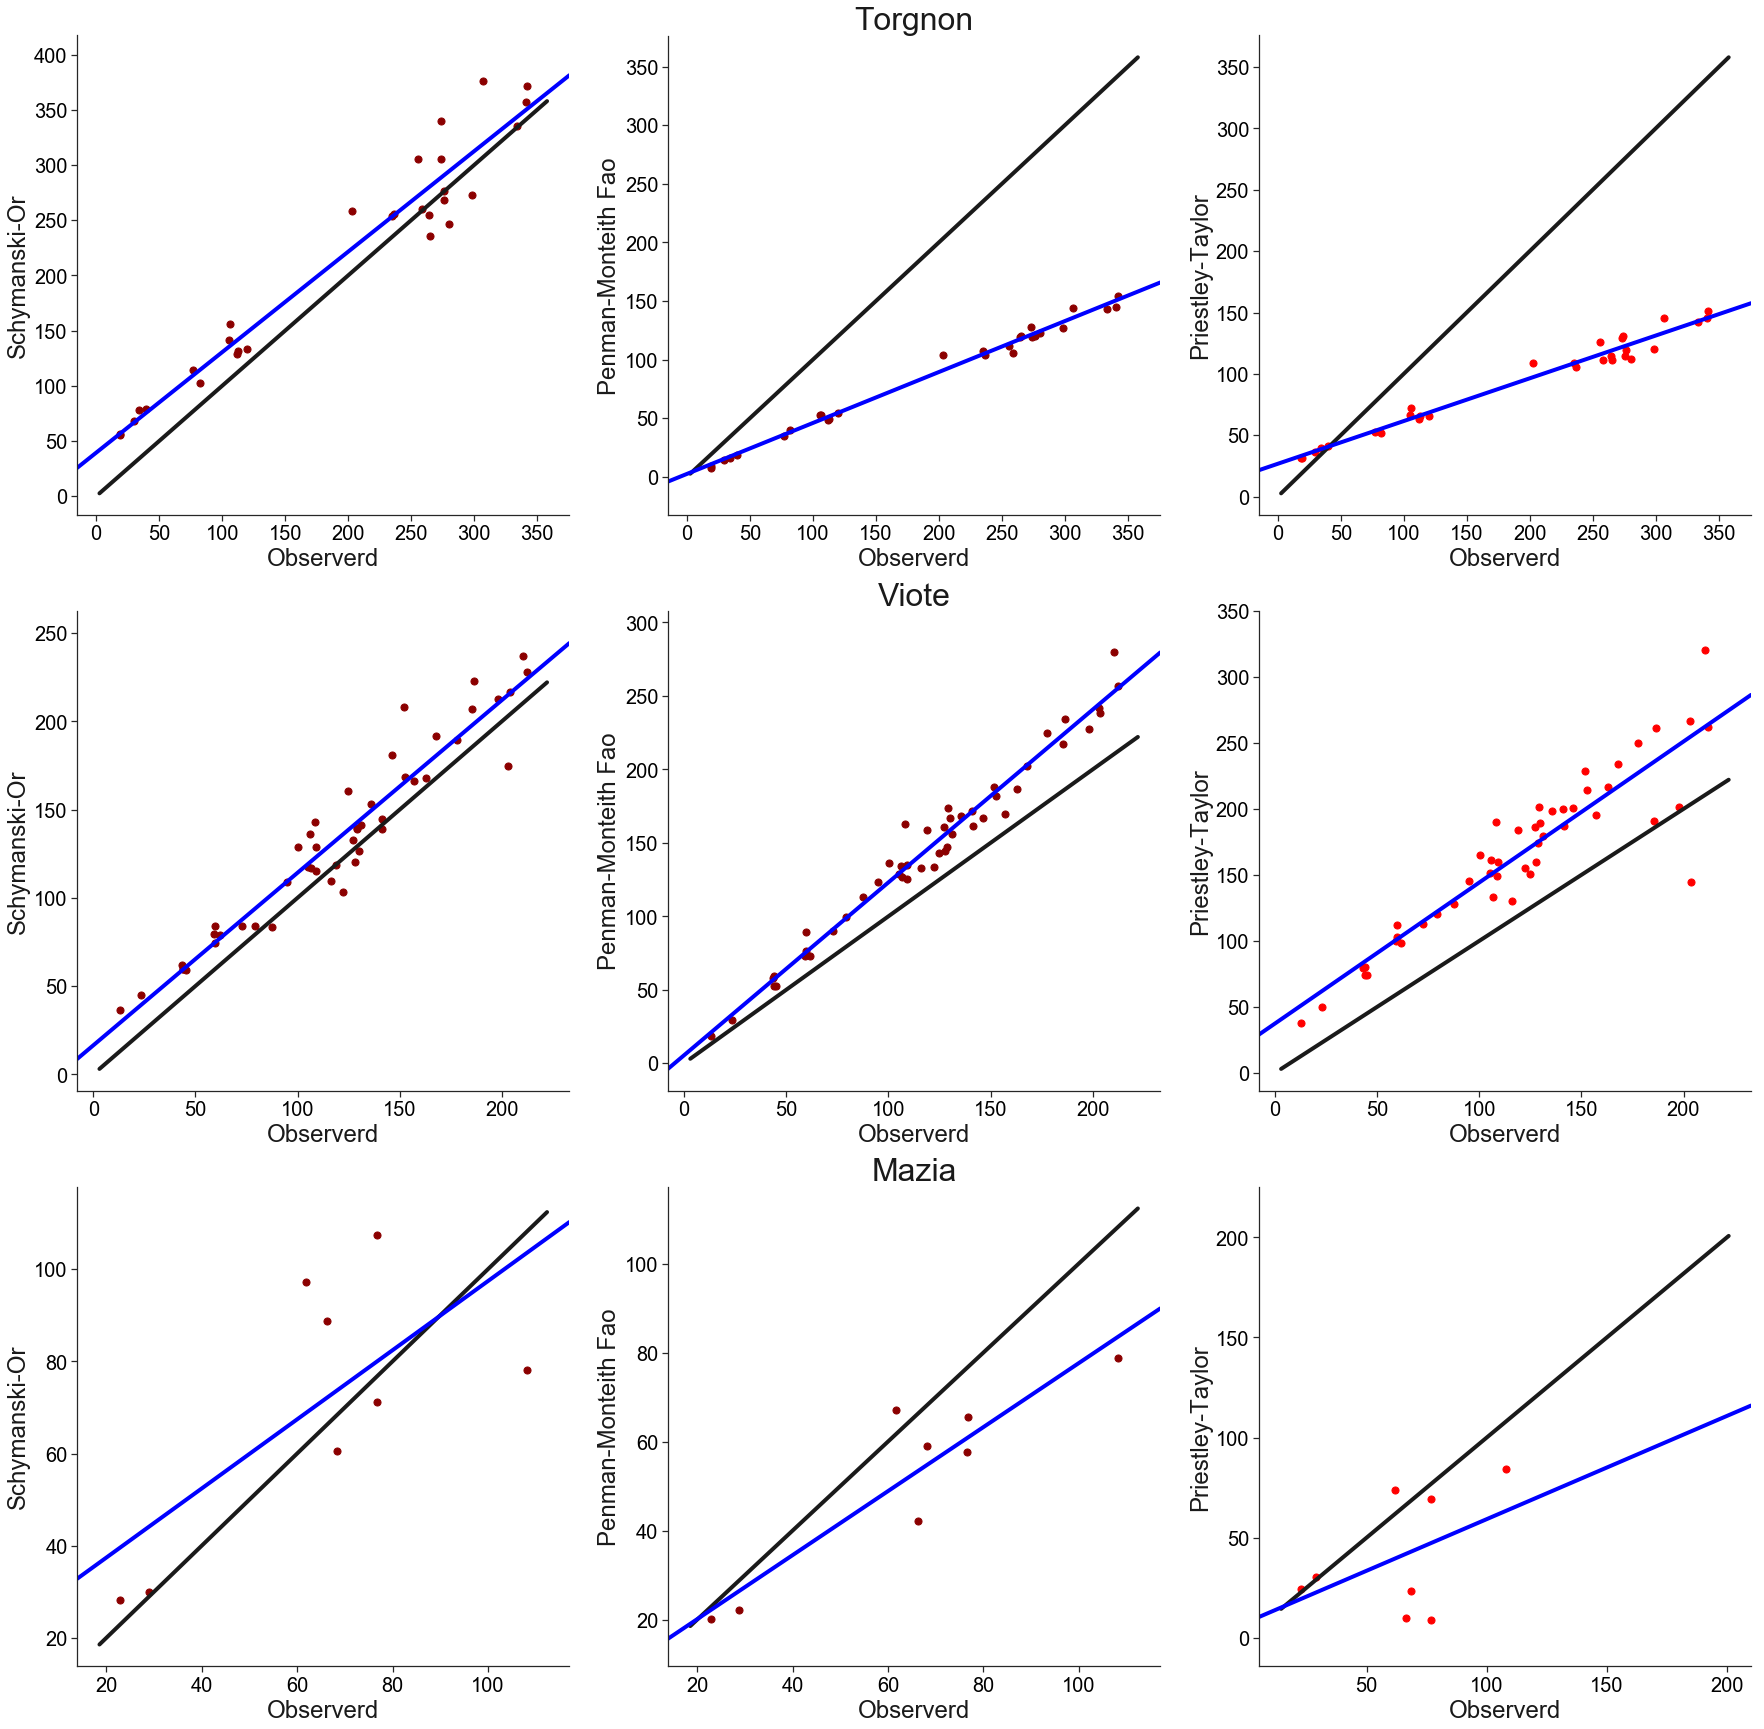

In [73]:
g, axes = plt.subplots(nrows=3, ncols=3)
ax11 = axes[0][0]  
ax12 = axes[0][1]  
ax13 = axes[0][2] 
ax21 = axes[1][0]  
ax22 = axes[1][1]  
ax23 = axes[1][2] 
ax31 = axes[2][0]  
ax32 = axes[2][1]  
ax33 = axes[2][2] 
#  	faoTBow 	ptTBow 	soTBow 	faoVBow 	ptVBow 	soVBow 	faoMBow 	ptMBow 	soMBow 	obsT 	obsV 	obsM

sns.set(style="ticks")
##################            TORGNON            #############################
g = sns.regplot(x=dfValuesMonthly['obsT'], y=dfValuesMonthly['obsT'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax11,marker="o")
g = sns.regplot(x=dfValuesMonthly['obsT'], y=dfValuesMonthly['soTBow'], ci = False,scatter_kws={"color":"darkred","alpha":1,"s":50},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax11,marker="o")
##################            TORGNON            #############################

g = sns.regplot(x=dfValuesMonthly['obsT'], y=dfValuesMonthly['obsT'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax12,marker="o")
g = sns.regplot(x=dfValuesMonthly['obsT'], y=dfValuesMonthly['ptTBow'], ci = False,scatter_kws={"color":"darkred","alpha":1,"s":50},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax12,marker="o")
g.axes.set_title('Torgnon', fontsize=32,color="k",alpha=1)
##################            TORGNON            #############################

g = sns.regplot(x=dfValuesMonthly['obsT'], y=dfValuesMonthly['obsT'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax13,marker="o")
g = sns.regplot(x=dfValuesMonthly['obsT'], y=dfValuesMonthly["faoTBow"], ci = False,scatter_kws={"color":"red","alpha":1,"s":50},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax13,marker="o")
################################################################################

##################            VIOTE            #############################
g = sns.regplot(x=dfValuesMonthly['obsV'], y=dfValuesMonthly['obsV'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax21,marker="o")
g = sns.regplot(x=dfValuesMonthly['obsV'], y=dfValuesMonthly['soVBow'], ci = False,scatter_kws={"color":"darkred","alpha":1,"s":50},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax21,marker="o")
##################            VIOTE            #############################

g = sns.regplot(x=dfValuesMonthly['obsV'], y=dfValuesMonthly['obsV'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax22,marker="o")
g = sns.regplot(x=dfValuesMonthly['obsV'], y=dfValuesMonthly['ptVBow'], ci = False,scatter_kws={"color":"darkred","alpha":1,"s":50},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax22,marker="o")
g.axes.set_title('Viote', fontsize=32,color="k",alpha=1)
##################            VIOTE            #############################

g = sns.regplot(x=dfValuesMonthly['obsV'], y=dfValuesMonthly['obsV'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax23,marker="o")
g = sns.regplot(x=dfValuesMonthly['obsV'], y=dfValuesMonthly["faoVBow"], ci = False,scatter_kws={"color":"red","alpha":1,"s":50},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax23,marker="o")
################################################################################


##################            MAZIA            #############################
g = sns.regplot(x=dfValuesMonthly['obsM'], y=dfValuesMonthly['obsM'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax31,marker="o")
g = sns.regplot(x=dfValuesMonthly['obsM'], y=dfValuesMonthly['soMBow'], ci = False,scatter_kws={"color":"darkred","alpha":1,"s":50},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax31,marker="o")
##################            MAZIA            #############################

g = sns.regplot(x=dfValuesMonthly['obsM'], y=dfValuesMonthly['obsM'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax32,marker="o")
g = sns.regplot(x=dfValuesMonthly['obsM'], y=dfValuesMonthly['ptMBow'], ci = False,scatter_kws={"color":"darkred","alpha":1,"s":50},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax32,marker="o")
g.axes.set_title('Mazia', fontsize=32,color="k",alpha=1)
##################            MAZIA            #############################

g = sns.regplot(x=dfValuesMonthly['obsM'], y=dfValuesMonthly['obsM'], ci = False,scatter_kws={"color":"black","alpha":0.3,"s":0},
                line_kws={"color":"k","alpha":1.0,"lw":4},ax=ax33,marker="o")
g = sns.regplot(x=dfValuesMonthly['obsM'], y=dfValuesMonthly["faoMBow"], ci = False,scatter_kws={"color":"red","alpha":1,"s":50},
                line_kws={"color":"blue","alpha":1.0,"lw":4},ax=ax33,marker="o")
################################################################################
sns.despine()
ax11.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
ax12.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
ax13.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)

ax21.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
ax22.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
ax23.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)

ax31.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
ax32.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
ax33.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)
g.figure.set_size_inches(30,30)
for ax in [ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33]:
#     ax.set_ylim([-0,600])
#     ax.set_xlim([-0,600])
    ax.set_xlabel("Observerd",size = 24,color="k",alpha=1)
    ax.tick_params(labelsize=20,labelcolor="black")

In [74]:
dfDiffRel = pd.concat([(dfValues['faoTBow']-dfValues['obsT'])/dfValues['obsT'], 
                    (dfValues['ptTBow']-dfValues['obsT'])/dfValues['obsT'],
                    (dfValues['soTBow']-dfValues['obsT'])/dfValues['obsT'],
                    (dfValues['faoVBow']-dfValues['obsV'])/dfValues['obsV'], 
                    (dfValues['ptVBow']-dfValues['obsV'])/dfValues['obsV'],
                    (dfValues['soVBow']-dfValues['obsV'])/dfValues['obsV'],
                    (dfValues['faoMBow']-dfValues['obsM'])/dfValues['obsM'], 
                    (dfValues['ptMBow']-dfValues['obsM'])/dfValues['obsM'],
                    (dfValues['soMBow']-dfValues['obsM'])/dfValues['obsM']
                   ],axis=1, sort=False)
dfDiffRel.columns = ['RerrTFAO','RerrTPT','RerrTSO',
                  'RerrVFAO','RerrVPT','RerrVSO',
                  'RerrMFAO','RerrMPT','RerrMSO']

dfDiffRel['month'] = dfDiffRel.index.month
dfDiffRel.head()

RerrTFAO  RerrTPT  RerrTSO  RerrVFAO  RerrVPT  RerrVSO  \
Datetime                                                                      
2005-05-01 00:00:00       NaN      NaN      NaN       NaN      NaN      NaN   
2005-05-01 00:30:00       NaN      NaN      NaN       NaN      NaN      NaN   
2005-05-01 01:00:00       NaN      NaN      NaN       NaN      NaN      NaN   
2005-05-01 01:30:00       NaN      NaN      NaN       NaN      NaN      NaN   
2005-05-01 02:00:00       NaN      NaN      NaN       NaN      NaN      NaN   

                     RerrMFAO  RerrMPT  RerrMSO  month  
Datetime                                                
2005-05-01 00:00:00       NaN      NaN      NaN      5  
2005-05-01 00:30:00       NaN      NaN      NaN      5  
2005-05-01 01:00:00       NaN      NaN      NaN      5  
2005-05-01 01:30:00       NaN      NaN      NaN      5  
2005-05-01 02:00:00       NaN      NaN      NaN      5

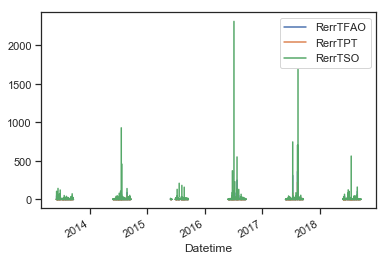

In [75]:
dfDiffRel.iloc[:,:3].plot()

In [76]:
dfVAR2.head(10)

NameError: name 'dfVAR2' is not defined

In [ ]:
dfVAR = pd.DataFrame(index=[5,6,7,8,9], columns=['RerrTFAO','RerrTPT','RerrTSO','RerrVFAO','RerrVPT','RerrVSO','RerrMFAO','RerrMPT','RerrMSO'])

[m,n] = dfDiff.shape
dfVAR2 = pd.DataFrame(index=range(m), columns=range(n))

print(range(1,n))
for count1 in range(1,m):
    for count2 in range(1,n):
        dfVAR2.at[count1,count2] =((dfDiff.iloc[count1, count2])) / dfValues.iloc[count1, count2]
     #   print( dfValues.iloc[count1, count2])


In [77]:
dfVAR2.index = dfDiff.index
dfVAR2.columns = dfDiff.columns

NameError: name 'dfVAR2' is not defined

In [78]:
dfVAR2['month']=pd.DatetimeIndex(dfVAR2.index).month
dfVAR2.head()

NameError: name 'dfVAR2' is not defined

In [79]:
dfVAR = pd.DataFrame(index=[5,6,7,8,9], columns=dfDiff.columns)

list1 = [5,6,7,8,9]
list2 = dfDiff.columns#['RerrTFAO','RerrTPT','RerrTSO','RerrVFAO','RerrVPT','RerrVSO','RerrMFAO','RerrMPT','RerrMSO']
for count1 in list1:
    for count2 in list2:
        dfVAR.at[count1,count2] =((dfVAR2.loc[dfVAR2['month'] == count1, count2])** 2).mean() ** .5

NameError: name 'dfVAR2' is not defined

In [80]:
dfVAR.head()

errTFAO errTPT errTSO errVFAO errVPT errVSO errMFAO errMPT errMSO month
5     NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN    NaN   NaN
6     NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN    NaN   NaN
7     NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN    NaN   NaN
8     NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN    NaN   NaN
9     NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN    NaN   NaN

In [81]:
list1 = [5,6,7,8,9]
list2 = ['errTFAO','errTPT','errTSO','errVFAO','errVPT','errVSO','errMFAO','errMPT','errMSO']
for count1 in list1:
    for count2 in list2:
        dfVAR.at[count1,count2] =(((dfDiff.loc[dfDiff['month'] == count1, count2])** 2).mean() ** .5)/dfValues.iloc[count1, count2]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [82]:
dfVAR

errTFAO errTPT errTSO errVFAO errVPT errVSO errMFAO errMPT errMSO month
5     NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN    NaN   NaN
6     NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN    NaN   NaN
7     NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN    NaN   NaN
8     NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN    NaN   NaN
9     NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN    NaN   NaN

In [83]:
dfRMSE.columns = ['RMSE_TFAO','RMSE_TPT','RMSE_TSO','RMSE_VFAO','RMSE_VPT','RMSE_VSO','RMSE_MFAO','RMSE_MPT','RMSE_MSO']
dfRMSE

ValueError: Length mismatch: Expected axis has 10 elements, new values have 9 elements

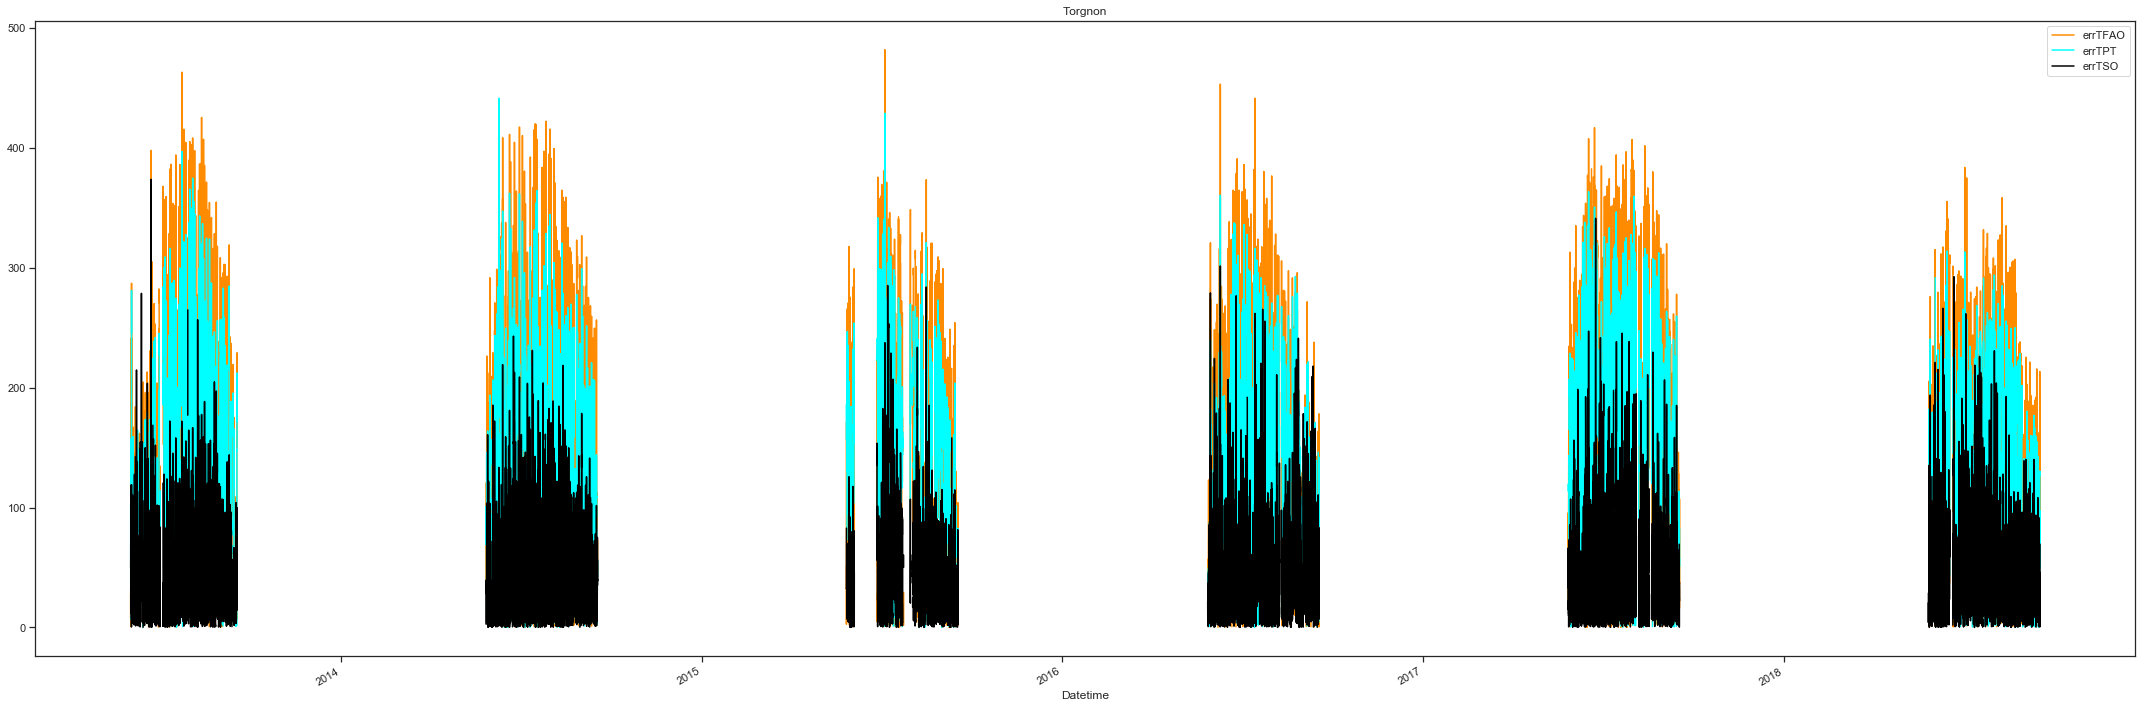

In [84]:
fig, axes = plt.subplots(figsize=(30,10))
# ax11 = axes[0] # ax12 = axes[1] # ax13 = axes[2] 

ax11 = axes#[0][0] 
# ax12 = axes[0][1] 
# # ax13 = axes[0][2] 

# ax21 = axes[1][0] 
# ax22 = axes[1][1] 
# ax23 = axes[1][2]



dfDiff.plot(kind='line', y=['errTFAO','errTPT','errTSO'], color=['darkorange','cyan','black','red'], 
           ax=ax11,title='Torgnon') #dfDiff['errSO']/3)
# dfValuesMonthly.plot(kind='line', y=['faoVBow','ptVBow','soVBow','obsV'], color=['darkorange','cyan','black','red'], # color=['darkorange','cyan','black'],
#            ax=ax12,  title='Viote') #s=dfDiff['errFAO']/3)
# # dfValuesMonthly.plot(kind='line', y=['faoMBow','ptMBow','soMBow','obsM'], color=['darkorange','cyan','black','red'],  #color=['darkorange','cyan','black'],
# #            ax=ax13,title='Mazia') #s=dfDiff['errPT']/3)


# dfValuesCum.plot(kind='line', y=['faoTBow','ptTBow','soTBow','obsT'], color=['darkorange','cyan','black','red'], 
#            ax=ax21,title='Torgnon') #dfDiff['errSO']/3)
# dfValuesCum.plot(kind='line', y=['faoVBow','ptVBow','soVBow','obsV'], color=['darkorange','cyan','black','red'], # color=['darkorange','cyan','black'],
#            ax=ax22,  title='Viote') #s=dfDiff['errFAO']/3)
# # dfValuesCum.plot(kind='line', y=['faoMBow','ptMBow','soMBow','obsM'], color=['darkorange','cyan','black','red'],  #color=['darkorange','cyan','black'],
# #            ax=ax23,title='Mazia') #s=dfDiff['errPT']/3)

# # dfValuesMonthly.plot(kind='scatter', x=['obsV','obsV','obsV'], y=['faoVBow','ptVBow','soVBow'],# color=['darkorange','cyan','black'],
# #            ax=ax12,  title='Viote') #s=dfDiff['errFAO']/3)
# # dfValuesMonthly.plot(kind='scatter', x=['obsM','obsM','obsM'], y=['faoMBow','ptMBow','soMBow'], #color=['darkorange','cyan','black'],
# #            ax=ax13,title='Mazia') #s=dfDiff['errPT']/3)
# # yticks = np.arange(start=-100, stop=100, step=100)
# # for ax in [ax11, ax12, ax13, ax21, ax22, ax23]:
# for ax in [ax11, ax12, ax21, ax22]:
# #     ax.get_xaxis().set_ticks(yticks)
# #     ax.yaxis.set_ticks(yticks)
#     ax.tick_params(axis='both', which='major', labelsize=12)
#     ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
# fig.add_subplot(111, frameon=False);
# plt.grid(False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.xlabel("Latent heat observed + error [W/m2] \n", size=15, family='DejaVu Sans');   
# plt.ylabel("Latent heat simulated [W/m2] \n", size=15, family='DejaVu Sans');   

# plt.title("Deviation \n", size=22, family='DejaVu Sans');
plt.tight_layout() 

In [85]:
dfMAE = pd.DataFrame(index=[5,6,7,8,9], columns=['errTFAO','errTPT','errTSO','errVFAO','errVPT',
                                                  'errVSO','errMFAO','errMPT','errMSO'])

In [86]:
list1 = [5,6,7,8,9]
list2 = ['errTFAO','errTPT','errTSO','errVFAO','errVPT','errVSO','errMFAO','errMPT','errMSO']
for count1 in list1:
    for count2 in list2:
        dfMAE.at[count1,count2] =((dfDiff.loc[dfDiff['month'] == count1, count2])).mean()

In [87]:
dfMAE.columns = ['MAE_TFAO','MAE_TPT','MAE_TSO','MAE_VFAO','MAE_VPT','MAE_VSO','MAE_MFAO','MAE_MPT','MAE_MSO']
dfMAE

MAE_TFAO  MAE_TPT  MAE_TSO MAE_VFAO  MAE_VPT  MAE_VSO MAE_MFAO  MAE_MPT  \
5  109.921  103.263  36.1355  79.1178  70.1883   46.561  251.288  154.137   
6  145.166  140.937  46.9145  63.3805  53.1303   53.491      NaN      NaN   
7  170.297  166.372  56.0864  78.6735  57.3431  57.3853  130.288  138.202   
8  159.349  154.795  50.1182  64.8679  48.9052  46.2347  129.602  146.705   
9  117.382  112.985   44.056  50.8474  38.1058  40.3887  126.257  107.195   

   MAE_MSO  
5  159.543  
6      NaN  
7    135.5  
8  171.616  
9  105.154

In [88]:
dfValues.head()

faoTBow  ptTBow  soTBow   faoVBow    ptVBow     soVBow  \
Datetime                                                                      
2005-05-01 00:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 00:30:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 01:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 01:30:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   
2005-05-01 02:00:00      NaN     NaN     NaN  9.784312  0.347062  13.775188   

                     faoMBow  ptMBow  soMBow  obsT  obsV  obsM  month  
Datetime                                                               
2005-05-01 00:00:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 00:30:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 01:00:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 01:30:00      NaN     NaN     NaN   NaN   NaN   NaN      5  
2005-05-01 02:00:00      NaN     NaN     NaN   NaN   NaN   NaN      5

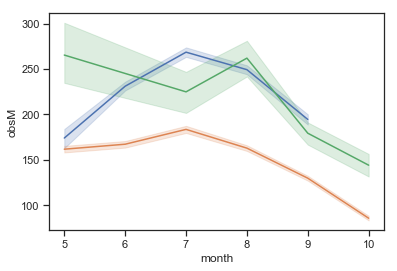

In [89]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
# ax11 = axes[0]
# ax12 = axes[1] 
# ax13 = axes[2] 
# sns.boxplot(ax=ax11,data=dataT, x='month', y='Deviation [W/m2]', hue='Method',palette="Set1",linewidth=3.5)
# sns.boxplot(ax=ax12,data=dataV, x='month', y='Deviation [W/m2]', hue='Method',palette="Set2",linewidth=3.5)
# sns.boxplot(ax=ax13,data=dataM, x='month', y='Deviation [W/m2]', hue='Method',palette="Set3",linewidth=3.5)
# sns.set_context("paper", rc={"axes.labelsize":24})
sns.lineplot(x="month", y="obsT",
        #   hue="region", style="event",
             data=dfValues)
sns.lineplot(x="month", y="obsV",
        #   hue="region", style="event",
             data=dfValues)
sns.lineplot(x="month", y="obsM",
        #   hue="region", style="event",
             data=dfValues)

In [90]:
dfDiff['Hour'] = pd.DatetimeIndex(dfDiff.index).hour
dfDiff = dfDiff[dfDiff['Hour'].isin(range(5,21))]#.iloc[:,:].dropna(how='any')


In [91]:
dfDiffDayT = dfDiff[['errTFAO','errTPT','errTSO','Hour']]

dfDiffDayV = dfDiff[['errVFAO','errVPT','errVSO','Hour']]
dfDiffDayM = dfDiff[['errMFAO','errMPT','errMSO','Hour']]

dfDiffDayT.head()

errTFAO  errTPT  errTSO  Hour
Datetime                                          
2005-05-01 05:00:00      NaN     NaN     NaN     5
2005-05-01 05:30:00      NaN     NaN     NaN     5
2005-05-01 06:00:00      NaN     NaN     NaN     6
2005-05-01 06:30:00      NaN     NaN     NaN     6
2005-05-01 07:00:00      NaN     NaN     NaN     7

In [92]:
dataDayT = dfDiffDayT.melt(id_vars=['Hour'], var_name='Method', value_name='Deviation [W/m2]')
dataDayV = dfDiffDayV.melt(id_vars=['Hour'], var_name='Method', value_name='Deviation [W/m2]')
dataDayM = dfDiffDayM.melt(id_vars=['Hour'], var_name='Method', value_name='Deviation [W/m2]')

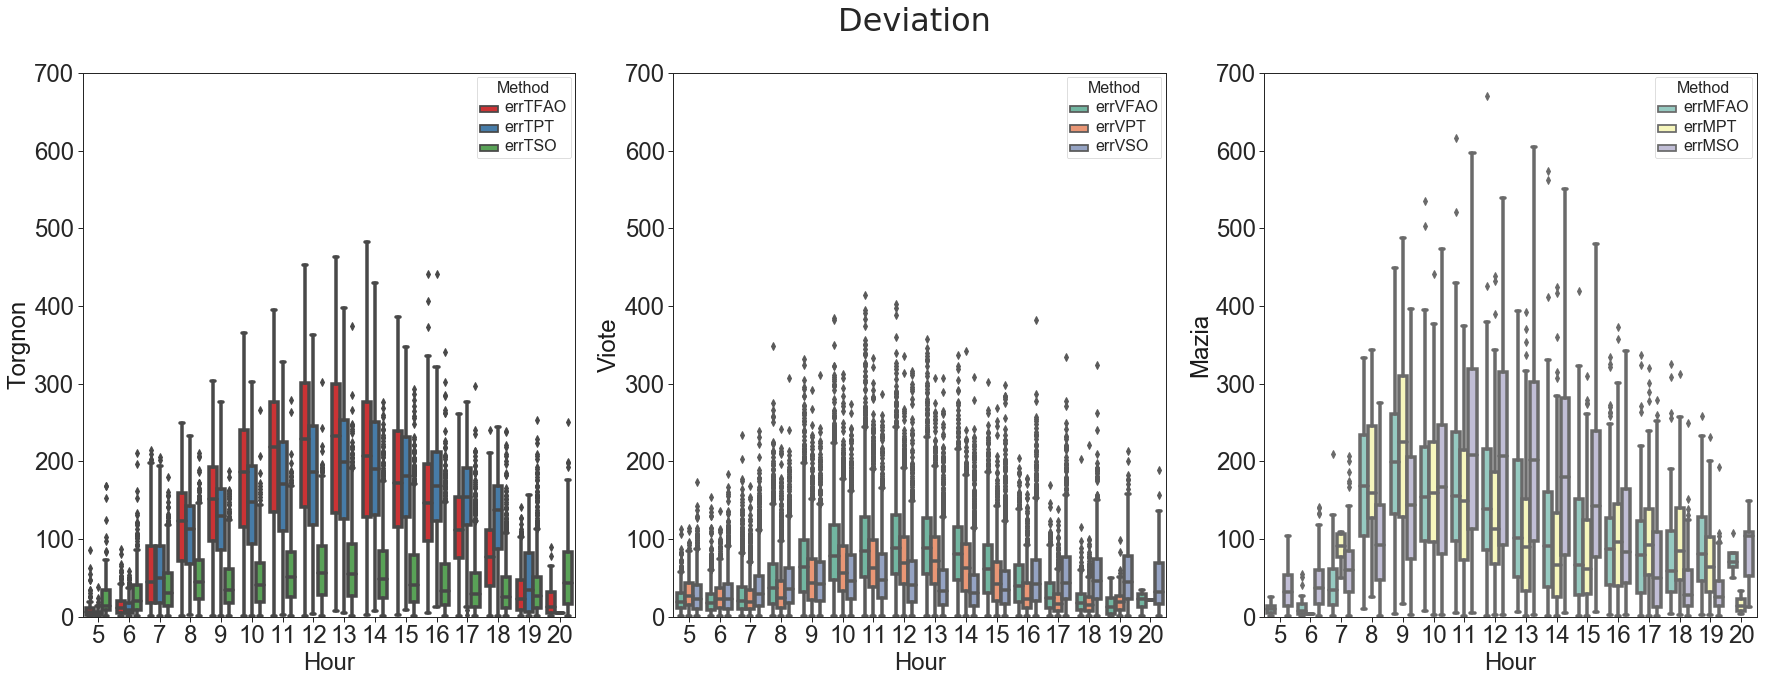

In [95]:
# fig, axes = plt.subplots(figsize=(30,20))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
ax11 = axes[0]
ax12 = axes[1] 
ax13 = axes[2] 
sns.boxplot(ax=ax11,data=dataDayT, x='Hour', y='Deviation [W/m2]', hue='Method',palette="Set1",linewidth=3.5)
sns.boxplot(ax=ax12,data=dataDayV, x='Hour', y='Deviation [W/m2]', hue='Method',palette="Set2",linewidth=3.5)
sns.boxplot(ax=ax13,data=dataDayM, x='Hour', y='Deviation [W/m2]', hue='Method',palette="Set3",linewidth=3.5)
sns.set_context("paper", rc={"axes.labelsize":24})



ax11.set_ylabel("Torgnon",size = 24,color="k",alpha=1)
ax12.set_ylabel("Viote",size = 24,color="k",alpha=1)
ax13.set_ylabel("Mazia",size = 24,color="k",alpha=1)

# ax21.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
# ax22.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
# ax23.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)

# ax31.set_ylabel("Schymanski-Or",size = 24,color="k",alpha=1)
# ax32.set_ylabel("Penman-Monteith Fao",size = 24,color="k",alpha=1)
# ax33.set_ylabel("Priestley-Taylor",size = 24,color="k",alpha=1)
for ax in [ax11, ax12, ax13]:
    ax.set_ylim((0,700))
   # labels = calendar.month_abbr[5:11]
    #ax.set_xticks(np.arange(start=5, stop=11, step=0.5))
   # ax.set_xticklabels(labels)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
    plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title
#     ax.set_label(axis = 'both')  
fig.add_subplot(111, frameon=False);
plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.xlabel("Latent heat observed + error [W/m2] \n", size=15, family='DejaVu Sans');   
#plt.ylabel("Latent heat simulated [W/m2] \n", size=15, family='DejaVu Sans');   
# plt.legend(title='dataset', loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Deviation \n", size=32, family='DejaVu Sans');


# plt.tight_layout()